<a href="https://colab.research.google.com/github/molerit00/Multivariate/blob/master/Modelo_1_Septiembre_22_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importamos librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = 'none'
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [ ]:
#Machine learning
import xgboost as xgb
from sklearn.preprocessing import OrdinalEncoder
import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

#Pandas
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  


# Leo archivo y formateo

In [ ]:
base = pd.read_excel('/content/drive/MyDrive/Politik/Files/Archivos Septiembre 2022/Base 6000 casos - Modelo Quilmes - completos.xlsx')

Creamos dataframe luego de subir la base, asi no tenemos que subir la base cada vez que queramos ver el original. El df es el que va a sufrir transformaciones

In [ ]:
df = base.copy() 

Contamos con 6.051 registros y 43 variables

In [ ]:
df.shape

(6051, 43)

In [ ]:
df.head()

,NOMBRE COMPLETO,MES DE RECOLECCION,CUIT,DNI,CELULAR,FIJO,EMAIL,VIVE Y VOTA EN QUILMES,SEXO,EDAD,NIVEL EDUCATIVO,Municipio,LOCALIDAD,DOMICILIO COMPLETO,CONDICION LABORAL,TRABAJO,SECTOR,IMAGEN MILEI,VOTO FDT,VOTO JXC,VOTO MILEI,TRANSPORTE,Custom 2,Custom 3,SECCION ELECTORAL,COÓDIGO CIRCUITO ELECTORAL,CIRCUITO ELECTORAL,MESA ELECTORAL,GRADO JXC DE LA MESA,GRADO FDT DE LA MESA,VOTO ANTERIOR DIPUTADO NACIONAL 2021,ID SEGURIDAD,ID BACHEO,ID GESTION QUILMES,ID HRL,ID MACRI,ID MARTINIANO,ID CFK,ID ALBERTO F,ID AXEL KICILLOF,ID MAYRA MENDOZA,PPAL RESPONSABLE DEL PROBLEMA,PPAL PROBLEMA PERSONAL
0,MARIA DORA ISABEL CORTEZ,JUNIO,27010774638.00,1077463.00,NaN,1142525657.00,NaN,Si,Femenino,16 A 35 AÑOS,Terciario o universitario completo o incompleto,Quilmes,BERNAL,LEVALLE 602,Jubilado,Tiene un trabajo en blanco o registrado,Sector privado,NaN,Preferiria no votar,Podria votar,Preferiria no votar,No tiene ninguno,0209200614X,2092000787.00,2092.00,2092000787.00,787A,0209200614X,ALTO,BAJO,Diego Santilli por Juntos,Mala,Mala,Mala,Buena,Buena,Buena,Mala,Mala,Mala,Mala,El Gobierno Municipal,La inseguridad
1,ROSA PETRONA CAPURRO,JULIO,27014496209.00,1449620.00,NaN,1142002850.00,NaN,SI,Femenino,16 A 35 AÑOS,Sin instrucción o primaria completo o incompleto,Quilmes,QUILMES OESTE,RICARDO ROJAS 3705,Jubilado,Tiene un trabajo en blanco o registrado,Sector privado,Muy buena,Nunca votaria,Preferiria no votar,Seguro votaria,No tiene ninguno,0209201236X,0209200791A,2092.00,0209200791A,791B,0209201236X,MUY BAJO,MUY ALTO,Victoria Tolosa Paz por el Frente de Todos,Muy mala,Muy mala,Mala,Muy buena,Muy buena,Mala,Mala,Mala,Mala,Mala,El Gobierno Nacional,La situación económica
2,CLOTILDE YOLANDA ENRIQUEZ,JULIO,27017561869.00,1756186.00,NaN,1142533517.00,yolandaenriquez@live.com.ar,SI,Femenino,16 A 35 AÑOS,Sin instrucción o primaria completo o incompleto,Quilmes,QUILMES CENTRO,VIDELA 140 5 22,Jubilado,Es jubilado,NaN,Muy buena,No sabe,Podria votar,Preferiria no votar,No tiene ninguno,NaN,NaN,NaN,NaN,783.00,NaN,NaN,NaN,No sabe o no contesta,Mala,Mala,Muy mala,Muy buena,Buena,Buena,Muy mala,Muy mala,Muy mala,Muy mala,El Gobierno Nacional,El acceso a empleo
3,LUZ DESTEFANO,AGOSTO,27011600250.00,1160025.00,NaN,1142538452.00,luzcortizas@hotmail.com,SI,Femenino,MAS DE 56 AÑOS,Terciario o universitario completo o incompleto,Quilmes,QUILMES CENTRO,OLAVARRIA 264 9 B,Empleado;Jubilado,Es jubilado,NaN,NaN,Preferiria no votar,Preferiria no votar,Preferiria no votar,Tiene ambos,NaN,NaN,NaN,NaN,783.00,NaN,NaN,NaN,Diego Santilli por Juntos,Muy mala,Mala,Mala,Muy buena,Buena,Buena,Muy mala,Muy mala,Mala,Mala,El Gobierno Nacional,La inseguridad
4,CATALINA MOLINA,AGOSTO,27037158564.00,3715856.00,5491162762428.00,NaN,r.solisrp@gmail.com,SI,Masculino,16 A 35 AÑOS,Secundario completo o incompleto,Quilmes,EZPELETA OESTE,NAMUNCURA 2335,Jubilado,Es monotributista,Sector publico,NaN,Nunca votaria,Seguro votaria,Seguro votaria,Tiene moto,0209201269X,0209200791B,2092.00,0209200791B,791B,0209201269X,SWING,ALTO,Nicolás del Caño por el Frente de Izquierda y de los Trabajadores,Muy mala,Muy mala,Muy mala,Muy buena,Muy buena,Muy mala,Muy buena,Muy mala,Muy mala,Muy mala,El Gobierno Municipal,La situación económica


No hay duplicados

In [ ]:
len(df.drop_duplicates('DNI')) == len(df)

True

Nulos

In [ ]:
info = pd.DataFrame(df.dtypes,columns=['tipo'])
info['nulos']=df.isna().sum().values
info

,tipo,nulos
NOMBRE COMPLETO,object,0
MES DE RECOLECCION,object,0
CUIT,float64,0
DNI,float64,0
CELULAR,float64,580
FIJO,float64,4302
EMAIL,object,2051
VIVE Y VOTA EN QUILMES,object,0
SEXO,object,0
EDAD,object,0


In [ ]:
info[info['nulos']>0]

,tipo,nulos
CELULAR,float64,580
FIJO,float64,4302
EMAIL,object,2051
SECTOR,object,3056
IMAGEN MILEI,object,4026
Custom 2,object,3260
Custom 3,object,3260
SECCION ELECTORAL,float64,3260
COÓDIGO CIRCUITO ELECTORAL,object,3260
MESA ELECTORAL,object,3260


# Trabajo sobre columnas

Arreglo nombres de columnas acorde a buenas practicas

In [ ]:
df.columns = [x.lower().replace(' ','_') for x in df.columns]

In [ ]:
df.columns

Index(['nombre_completo', 'mes_de_recoleccion', 'cuit', 'dni', 'celular',
       'fijo', 'email', 'vive_y_vota_en_quilmes_', 'sexo', 'edad',
       'nivel_educativo', 'municipio', 'localidad', 'domicilio_completo',
       'condicion_laboral', 'trabajo', 'sector', 'imagen_milei', 'voto_fdt',
       'voto_jxc', 'voto_milei', 'transporte', 'custom_2', 'custom_3',
       'seccion_electoral', 'coódigo_circuito_electoral', 'circuito_electoral',
       'mesa_electoral', 'grado_jxc_de_la_mesa', 'grado_fdt_de_la_mesa',
       'voto_anterior_diputado_nacional_2021', 'id_seguridad', 'id_bacheo',
       'id_gestion_quilmes', 'id_hrl', 'id_macri', 'id_martiniano', 'id_cfk',
       'id_alberto_f', 'id_axel_kicillof', 'id_mayra_mendoza',
       'ppal_responsable_del_problema', 'ppal_problema_personal'],
      dtype='object')

##Eliminamos columnas 
con informacion personal o constantes que no suman info al modelo.

(El mes de recolección será eliminado mas adelante)

In [ ]:
columnas_drop = ['nombre_completo', 'cuit', 'dni', 'celular','fijo', 'email', 
                  'vive_y_vota_en_quilmes_','municipio','domicilio_completo','custom_2', 'custom_3',
                  'seccion_electoral', 'coódigo_circuito_electoral', 'circuito_electoral','mesa_electoral']

In [ ]:
df = df.drop(columns = columnas_drop)

In [ ]:
df.shape

(6051, 28)

##Edad 
Corregimos EDAD para que no tenga opciones duplicadas removiendo espacios

In [ ]:
df['edad']=df.edad.str.strip()

In [ ]:
df.edad.value_counts()

36 A 55 AÑOS      3009
MAS DE 56 AÑOS    2199
16 A 35 AÑOS       843
Name: edad, dtype: int64

##Condicion laboral

***CORREGIR***, AGARRAR TRABAJO QUE ES DE LA SURVEY E IMPUTAR POR CONDICION LABORAL PRIMERA, SI TIENE NULOS EN AMBOS, VER



Borramos la columna y nos quedamos con "trabajo" por lo indicado en la reunion

In [ ]:
df = df.drop(columns=['condicion_laboral'])

Borrar de aca a abajo

In [ ]:
df.condicion_laboral.value_counts()

AttributeError: ignored

In [ ]:
df['condicion_laboral']=[x.split(';')[0] if x != 0 else '0' for x in df.condicion_laboral ]

AttributeError: ignored

In [ ]:
df.condicion_laboral.value_counts()

AttributeError: ignored

In [ ]:
df.groupby(['edad','condicion_laboral'])['condicion_laboral'].agg(['count'])

KeyError: ignored

Imputamos por la moda

In [ ]:
df['condicion_laboral'] =['Empleado' if x == '0' and y == '16 A 35 AÑOS' else 'Empleado' if x == '0' and y == '36 A 55 AÑOS' else 'Jubilado' if x == '0' and y == 'MAS DE 56 AÑOS' else x for x, y in zip(df.condicion_laboral,df.edad)]

AttributeError: ignored

In [ ]:
df['condicion_laboral'].value_counts()

Empleado          3869
Jubilado          1644
Monotributista     397
Autónomo           141
Name: condicion_laboral, dtype: int64

## Agrupamos respuestas de intenciones e imagenes

Intenciones no tiene nulos

In [ ]:
intenciones = ['voto_fdt',	'voto_jxc','voto_milei']
for partido in intenciones:
  lista = ['alta' if i == 'Podria votar' or i== 'Seguro votaria' else 'baja' if i == 'Preferiria no votar' or i== 'Nunca votaria'  else 'neutro' for i in df[partido]]

  df[partido]=lista

In [ ]:
df[partido].value_counts()

baja      4015
alta      1683
neutro     353
Name: voto_milei, dtype: int64

Imagenes si tienen nulos

In [ ]:
for imagen in ['imagen_milei','id_seguridad', 'id_bacheo', 'id_gestion_quilmes', 'id_hrl', 'id_macri','id_martiniano', 'id_cfk', 'id_alberto_f', 'id_axel_kicillof','id_mayra_mendoza']:
  lista = ['buena' if i == 'Buena' or i== 'Muy buena' else 'mala' if i == 'Mala' or i== 'Muy mala' else 'neutro' if i == 'No desea contestar' or i == 'No lo conoce' else None for i in df[imagen]]

  df[imagen]=lista

Idem para grados

In [ ]:
for grado in ['grado_jxc_de_la_mesa','grado_fdt_de_la_mesa']:
  lista = ['alto' if i == 'ALTO' or i== 'MUY ALTO' else 'bajo' if i == 'BAJO' or i== 'MUY BAJO' else 'swing' if i == 'SWING' else None for i in df[grado]]

  df[grado]=lista

# Vemos distribuciones

Importo funcion para mostrar dfs en mismo output

In [ ]:
#Funcion para mostrar DataFrames lado por lado
#fuente: https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side

from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

Creo función para enseñar valores unicos

In [ ]:
def valores_unicos(columna):
    data_frame = pd.DataFrame(df[columna].value_counts())
    data_frame['share']=data_frame[columna]/sum(data_frame[columna])*100 
    return data_frame

for col in df.columns:
    display_side_by_side(valores_unicos(col).head(),titles = [col])

,mes_de_recoleccion,share
AGOSTO,2134,35.27
JULIO,2025,33.47
JUNIO,1892,31.27


,sexo,share
Femenino,3353,55.41
Masculino,2698,44.59


,edad,share
36 A 55 AÑOS,3009,49.73
MAS DE 56 AÑOS,2199,36.34
16 A 35 AÑOS,843,13.93


,nivel_educativo,share
Terciario o universitario completo o incompleto,3371,55.71
Secundario completo o incompleto,1982,32.75
Sin instrucción o primaria completo o incompleto,698,11.54


,localidad,share
QUILMES CENTRO,2242,37.05
BERNAL,830,13.72
QUILMES OESTE,766,12.66
SAN FRANCISCO SOLANO,580,9.59
BERNAL OESTE,556,9.19


,trabajo,share
Tiene un trabajo en blanco o registrado,2385,39.41
Es jubilado,1497,24.74
Ninguna de las anteriores,1400,23.14
Es monotributista,769,12.71


,sector,share
Sector privado,2209,73.76
Sector publico,786,26.24


,imagen_milei,share
mala,1105,56.29
buena,683,34.79
neutro,175,8.91


,voto_fdt,share
baja,3106,51.33
alta,2516,41.58
neutro,429,7.09


,voto_jxc,share
alta,2861,47.28
baja,2799,46.26
neutro,391,6.46


,voto_milei,share
baja,4015,66.35
alta,1683,27.81
neutro,353,5.83


,transporte,share
Tiene auto,2814,46.50
No tiene ninguno,2726,45.05
Tiene ambos,312,5.16
Tiene moto,199,3.29


,grado_jxc_de_la_mesa,share
alto,1275,45.68
bajo,993,35.58
swing,523,18.74


,grado_fdt_de_la_mesa,share
bajo,1172,41.99
alto,1115,39.95
swing,504,18.06


,voto_anterior_diputado_nacional_2021,share
Diego Santilli por Juntos,963,35.26
Victoria Tolosa Paz por el Frente de Todos,940,34.42
No sabe o no contesta,263,9.63
José Luis Espert por Avanza Libertad,206,7.54
Florencio Randazzo por Vamos con Vos,122,4.47


,id_seguridad,share
mala,2167,79.35
buena,505,18.49
neutro,59,2.16


,id_bacheo,share
mala,1584,58.00
buena,1087,39.80
neutro,60,2.20


,id_gestion_quilmes,share
mala,1656,60.64
buena,1019,37.31
neutro,56,2.05


,id_hrl,share
buena,1430,52.36
mala,1147,42.00
neutro,154,5.64


,id_macri,share
mala,1603,58.70
buena,1047,38.34
neutro,81,2.97


,id_martiniano,share
buena,1458,53.39
mala,1126,41.23
neutro,147,5.38


,id_cfk,share
mala,1665,60.97
buena,998,36.54
neutro,68,2.49


,id_alberto_f,share
mala,1764,64.59
buena,880,32.22
neutro,87,3.19


,id_axel_kicillof,share
mala,1606,58.81
buena,1016,37.20
neutro,109,3.99


,id_mayra_mendoza,share
mala,1670,61.15
buena,925,33.87
neutro,136,4.98


,ppal_responsable_del_problema,share
El Gobierno Nacional,1166,42.69
La oposición,382,13.99
El Gobierno Municipal,344,12.60
El Gobierno de la Provincia,307,11.24
La sociedad,228,8.35


,ppal_problema_personal,share
La situación económica,1124,41.16
La inseguridad,676,24.75
La corrupción,393,14.39
El acceso a empleo,115,4.21
El estado de las calles y veredas,107,3.92


# Resultados de intenciones de voto - Gráficos

## General

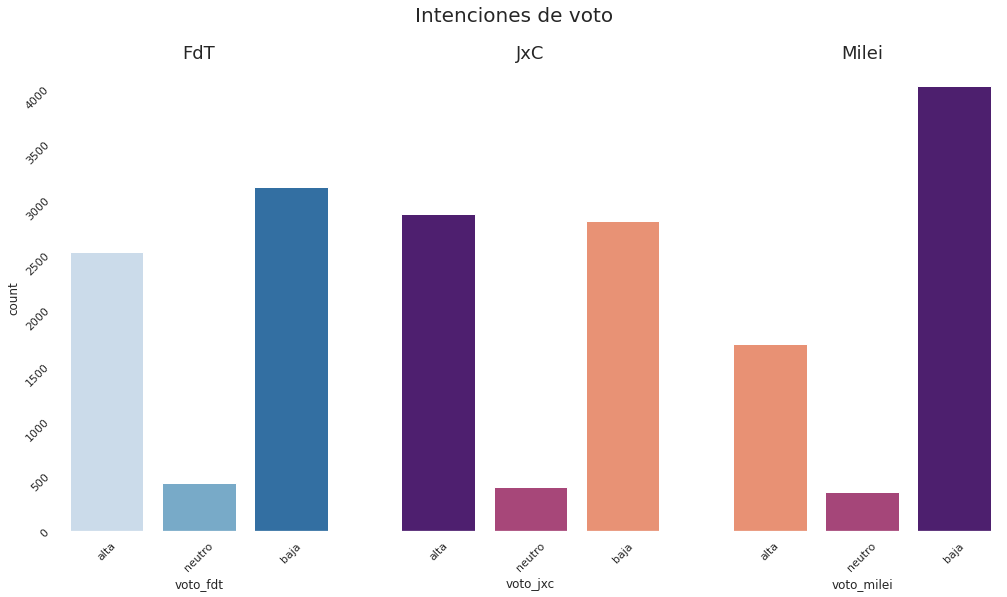

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
plt.rcParams['axes.facecolor'] = 'none'
fig, axes = plt.subplots(1,3, sharex='col', sharey='row')
order = ['alta','neutro','baja']
fig.suptitle("Intenciones de voto", fontsize=20)

ax =sns.countplot(data=df, x='voto_fdt', palette='Blues', ax = axes[0],order=order)
ax.set_title('FdT',fontsize=18)
ax.tick_params(labelrotation=45)

ax2 = sns.countplot(data=df, x='voto_jxc', palette='magma', ax = axes[1],order=order)
ax2.set_title('JxC',fontsize=18)
ax2.tick_params(labelrotation=45)
ax2.get_yaxis().set_visible(False)

ax3 = sns.countplot(data=df, x='voto_milei', palette='magma_r', ax = axes[2],order=order)
ax3.set_title('Milei',fontsize=18)
ax3.tick_params(labelrotation=45)
ax3.get_yaxis().set_visible(False)

In [ ]:
rdos = df.copy()
intenciones = ['voto_fdt','voto_jxc','voto_milei']
for partido in intenciones:
  lista = [1 if i == 'alta' else 0 for i in rdos[partido]]

  rdos[partido]=lista

In [ ]:
print(f'Porcentaje de target FdT en base total: {round(rdos.voto_fdt.mean()*100,2)} %')
print(f'Porcentaje de target JxC en base total: {round(rdos.voto_jxc.mean()*100,2)} %')
print(f'Porcentaje de target Milei en base total: {round(rdos.voto_milei.mean()*100,2)} %')

Porcentaje de target FdT en base total: 41.58 %
Porcentaje de target JxC en base total: 47.28 %
Porcentaje de target Milei en base total: 27.81 %


In [ ]:
temp = rdos[intenciones].agg({'mean'}).T
pal_ = list(sns.color_palette(palette='plasma_r',
                              n_colors=len(temp)).as_hex())

temp['Y'] = [1]*len(temp)
list_x = list(range(0,len(temp)))
temp['X'] = list_x

label = [i+'<br>'+str(round(j,3)) for i,j in zip(temp.index,temp['mean'])]
import plotly.express as px
fig = px.scatter(temp, x='X', y='Y',
                 color=temp.index, color_discrete_sequence=pal_,
                 size='mean', text=label, size_max=90
                )
fig.update_layout(width=600, height=320,
                  margin = dict(t=50, l=0, r=0, b=0),
                  showlegend=False
                 )
fig.update_traces(textposition='top center')
fig.update_xaxes(showgrid=False, zeroline=False, visible=False)
fig.update_yaxes(showgrid=False, zeroline=False, visible=False)
fig.update_layout({'plot_bgcolor': 'white',
                   'paper_bgcolor': 'white'})
fig.show()

## Segun demograficas

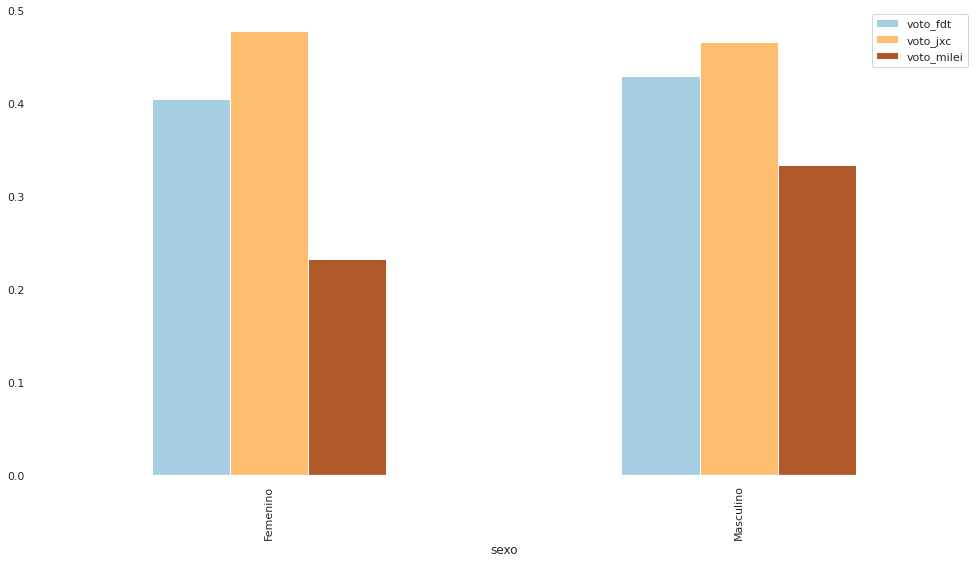

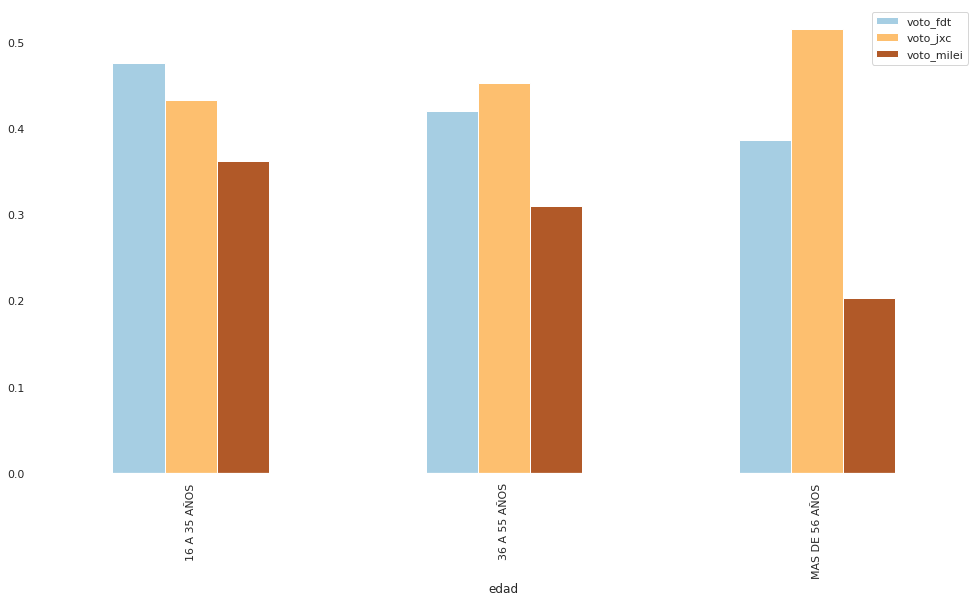

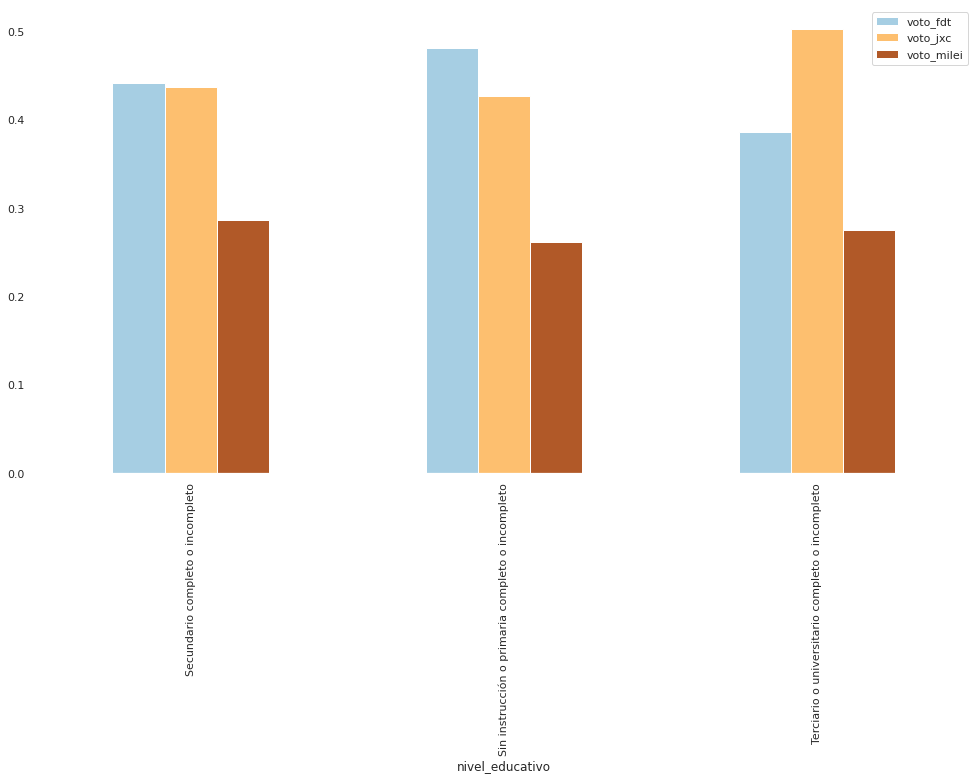

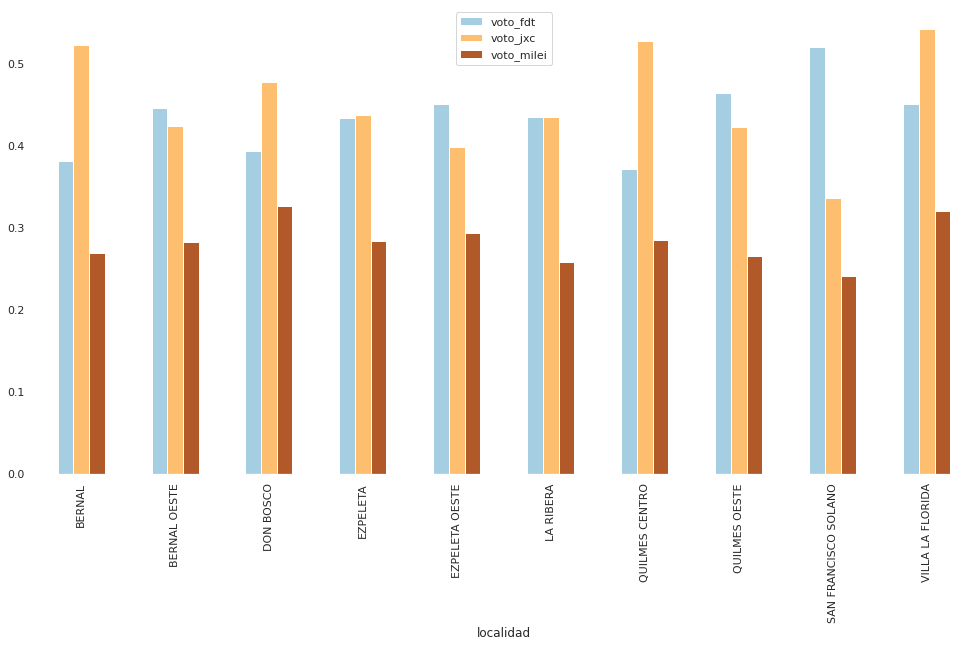

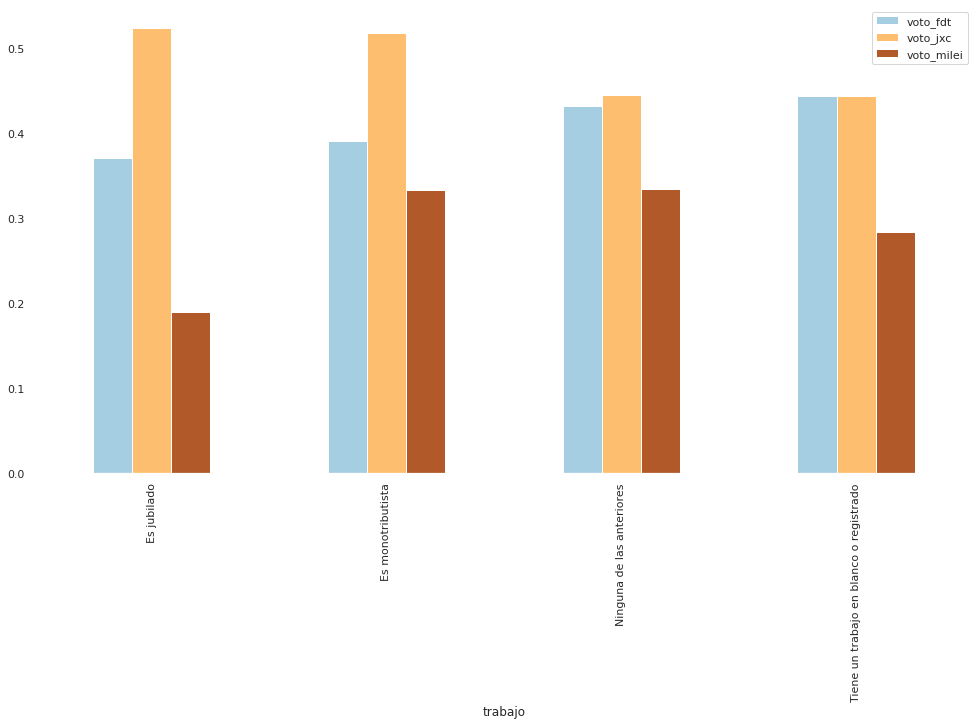

In [ ]:
demos = ['sexo', 'edad', 'nivel_educativo', 'localidad','trabajo']

for demo in demos:
  temp = rdos.groupby(demo)[intenciones].agg(['mean'])
  temp.columns = temp.columns.droplevel(1)
  temp.reset_index(inplace=True)
  temp.plot(x=temp.columns[0],y=intenciones,kind='bar', cmap="Paired")

## Según "hiperparametros" 

Sector publico vs privado y grados de mesa

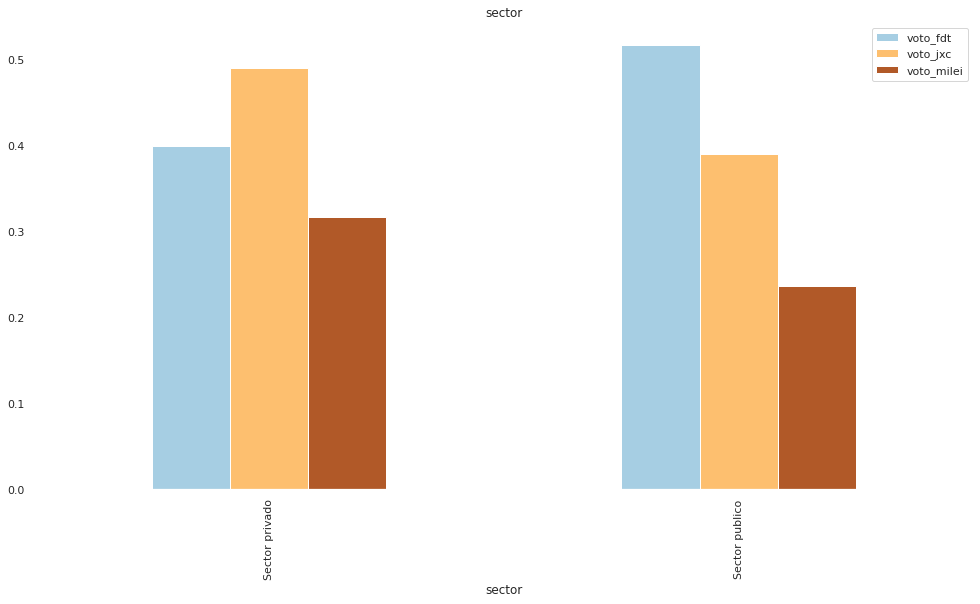

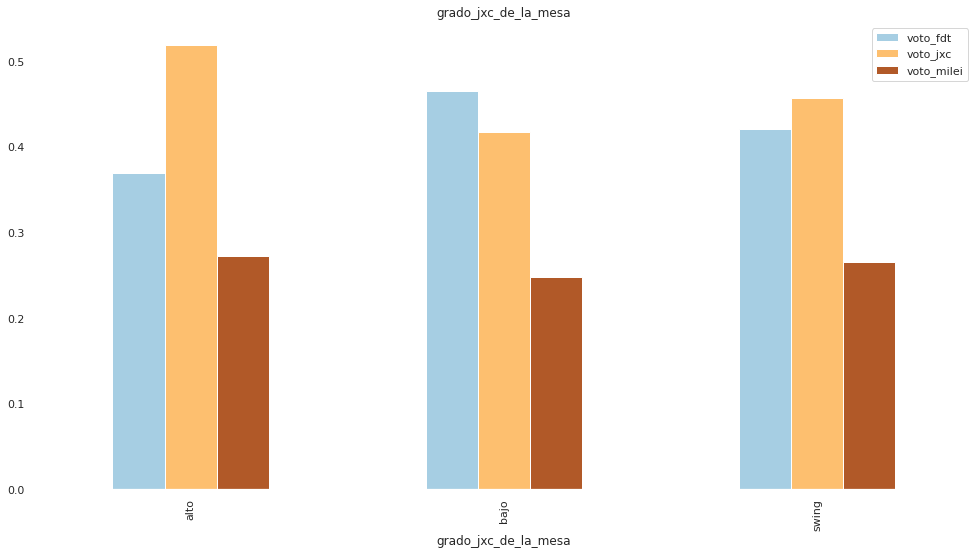

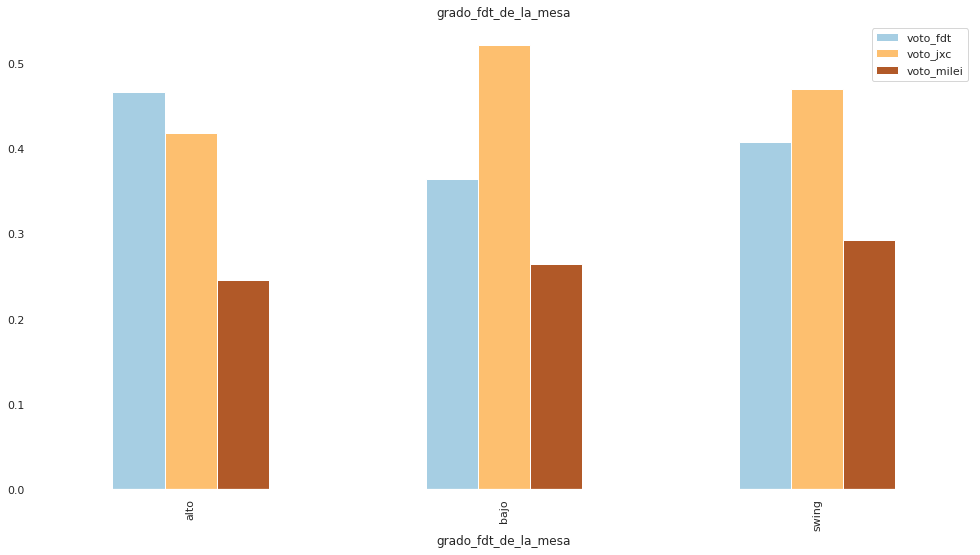

In [ ]:
hiper = ['sector','grado_jxc_de_la_mesa','grado_fdt_de_la_mesa']

for h in hiper:
  temp = rdos.groupby(h)[intenciones].agg(['mean'])
  temp.columns = temp.columns.droplevel(1)
  temp.reset_index(inplace=True)
  temp.plot(x=temp.columns[0],y=intenciones,kind='bar',cmap='Paired')
  plt.title(h)

#Modelos

## Transformaciones que aplican a todos los modelos

Binarizamos labels (intenciones de voto)

In [ ]:
intenciones = ['voto_fdt','voto_jxc','voto_milei']
for partido in intenciones:
  lista = [1 if i == 'alta' else 0 for i in df[partido]]

  df[partido]=lista

In [ ]:
print(f'Porcentaje de target FdT en base total: {round(df.voto_fdt.sum()/len(df)*100,2)} %')
print(f'Porcentaje de target JxC en base total: {round(df.voto_jxc.sum()/len(df)*100,2)} %')
print(f'Porcentaje de target Milei en base total: {round(df.voto_milei.sum()/len(df)*100,2)} %')

Porcentaje de target FdT en base total: 41.58 %
Porcentaje de target JxC en base total: 47.28 %
Porcentaje de target Milei en base total: 27.81 %


Eliminacion de columnas

In [ ]:
df = df.drop(columns=['mes_de_recoleccion'])

##Modelos con FillNa('otros')

Creamos copia

In [ ]:
df_o = df.copy()

Fill na con "otro"

In [ ]:
df_o.fillna('otro',inplace=True)

Dummies

In [ ]:
df_o = pd.get_dummies(df_o, columns=['sexo', 'edad', 'nivel_educativo', 'localidad',
       'trabajo', 'sector', 'imagen_milei', 'transporte', 'grado_jxc_de_la_mesa',
       'grado_fdt_de_la_mesa', 'voto_anterior_diputado_nacional_2021',
       'id_seguridad', 'id_bacheo', 'id_gestion_quilmes', 'id_hrl', 'id_macri',
       'id_martiniano', 'id_cfk', 'id_alberto_f', 'id_axel_kicillof',
       'id_mayra_mendoza', 'ppal_responsable_del_problema',
       'ppal_problema_personal'],drop_first=False)

In [ ]:
df_o.head()

,voto_fdt,voto_jxc,voto_milei,sexo_Femenino,sexo_Masculino,edad_16 A 35 AÑOS,edad_36 A 55 AÑOS,edad_MAS DE 56 AÑOS,nivel_educativo_Secundario completo o incompleto,nivel_educativo_Sin instrucción o primaria completo o incompleto,nivel_educativo_Terciario o universitario completo o incompleto,localidad_BERNAL,localidad_BERNAL OESTE,localidad_DON BOSCO,localidad_EZPELETA,localidad_EZPELETA OESTE,localidad_LA RIBERA,localidad_QUILMES CENTRO,localidad_QUILMES OESTE,localidad_SAN FRANCISCO SOLANO,localidad_VILLA LA FLORIDA,trabajo_Es jubilado,trabajo_Es monotributista,trabajo_Ninguna de las anteriores,trabajo_Tiene un trabajo en blanco o registrado,sector_Sector privado,sector_Sector publico,sector_otro,imagen_milei_buena,imagen_milei_mala,imagen_milei_neutro,imagen_milei_otro,transporte_No tiene ninguno,transporte_Tiene ambos,transporte_Tiene auto,transporte_Tiene moto,grado_jxc_de_la_mesa_alto,grado_jxc_de_la_mesa_bajo,grado_jxc_de_la_mesa_otro,grado_jxc_de_la_mesa_swing,grado_fdt_de_la_mesa_alto,grado_fdt_de_la_mesa_bajo,grado_fdt_de_la_mesa_otro,grado_fdt_de_la_mesa_swing,voto_anterior_diputado_nacional_2021_Cynthia Hotton por Valores para mi país,voto_anterior_diputado_nacional_2021_Diego Santilli por Juntos,voto_anterior_diputado_nacional_2021_Florencio Randazzo por Vamos con Vos,voto_anterior_diputado_nacional_2021_José Luis Espert por Avanza Libertad,voto_anterior_diputado_nacional_2021_Nicolás del Caño por el Frente de Izquierda y de los Trabajadores,voto_anterior_diputado_nacional_2021_No sabe o no contesta,voto_anterior_diputado_nacional_2021_No votó o votó nulo,voto_anterior_diputado_nacional_2021_Victoria Tolosa Paz por el Frente de Todos,voto_anterior_diputado_nacional_2021_Votó en blanco,voto_anterior_diputado_nacional_2021_otro,id_seguridad_buena,id_seguridad_mala,id_seguridad_neutro,id_seguridad_otro,id_bacheo_buena,id_bacheo_mala,id_bacheo_neutro,id_bacheo_otro,id_gestion_quilmes_buena,id_gestion_quilmes_mala,id_gestion_quilmes_neutro,id_gestion_quilmes_otro,id_hrl_buena,id_hrl_mala,id_hrl_neutro,id_hrl_otro,id_macri_buena,id_macri_mala,id_macri_neutro,id_macri_otro,id_martiniano_buena,id_martiniano_mala,id_martiniano_neutro,id_martiniano_otro,id_cfk_buena,id_cfk_mala,id_cfk_neutro,id_cfk_otro,id_alberto_f_buena,id_alberto_f_mala,id_alberto_f_neutro,id_alberto_f_otro,id_axel_kicillof_buena,id_axel_kicillof_mala,id_axel_kicillof_neutro,id_axel_kicillof_otro,id_mayra_mendoza_buena,id_mayra_mendoza_mala,id_mayra_mendoza_neutro,id_mayra_mendoza_otro,ppal_responsable_del_problema_El Gobierno Municipal,ppal_responsable_del_problema_El Gobierno Nacional,ppal_responsable_del_problema_El Gobierno de la Provincia,ppal_responsable_del_problema_La oposición,ppal_responsable_del_problema_La sociedad,ppal_responsable_del_problema_Ninguno,ppal_responsable_del_problema_No desea contestar,ppal_responsable_del_problema_Otro,ppal_responsable_del_problema_Yo mismo,ppal_responsable_del_problema_otro,ppal_problema_personal_El acceso a empleo,ppal_problema_personal_El acceso a la educación,ppal_problema_personal_El acceso a la salud,ppal_problema_personal_El estado de las calles y veredas,ppal_problema_personal_La corrupción,ppal_problema_personal_La inseguridad,ppal_problema_personal_La limpieza y recolección de residuos,ppal_problema_personal_La situación económica,ppal_problema_personal_No desea contestar,ppal_problema_personal_Otro,ppal_problema_personal_otro
0,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,

Correlaciones notables

In [ ]:
for col in ['voto_fdt', 'voto_jxc', 'voto_milei']:
    df_numerical_corr=round(df_o.corr()[col].sort_values(ascending=False).iloc[1:10],2)
    print('***********',col, 'correlacionada con:***********\n',df_numerical_corr,'\n')

*********** voto_fdt correlacionada con:***********
 id_axel_kicillof_buena                                                            0.40
id_cfk_buena                                                                      0.39
id_mayra_mendoza_buena                                                            0.38
voto_anterior_diputado_nacional_2021_Victoria Tolosa Paz por el Frente de Todos   0.37
id_gestion_quilmes_buena                                                          0.36
id_alberto_f_buena                                                                0.34
id_seguridad_buena                                                                0.28
id_bacheo_buena                                                                   0.28
ppal_responsable_del_problema_La oposición                                        0.25
Name: voto_fdt, dtype: float64 

*********** voto_jxc correlacionada con:***********
 id_macri_buena                                                   0.35
voto_ant

### FdT

Split

In [ ]:
X = df_o.drop('voto_fdt', axis=1)
y = df_o['voto_fdt']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo FdT auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo FdT auc: 0.753, 
 accuracy: 0.762, 
 matriz de confucion: 


array([[579, 142],
       [146, 344]])

Seleccion de variables?

In [ ]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectFromModel

thresholds = sort(xgb_model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	predictions = selection_model.predict(select_X_test)
	auc = roc_auc_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, auc: %.2f%" % (thresh, select_X_train.shape[1], auc))

Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.000, n=118, auc: 0.74%
Thresh=0.001, n=101, auc: 0.74%
Thresh=0.001, n=100, auc: 0.74%
Thresh=0.001, n=99, auc: 0.74%
Thresh=0.001, n=98, auc: 0.74%
Thresh=0.002, n=97, auc: 0.74%
Thresh=0.002, n=96, auc: 0.74%
Thresh=0.002, n=95, auc: 0.74%
Thresh=0.002, n=94, auc: 0.74%
Thresh=0.002, n=93, auc: 0.74%
Thresh=0.002, n=92, auc: 0.74%
Thresh=0.002, n=91, auc: 0.74%
Thresh=0.002, n=90, auc: 0.74%
Thresh=0.002, n=89, auc: 0.74%
Thresh=0.002, n=88, auc: 0.74%
Thresh=0.002, n=87, 

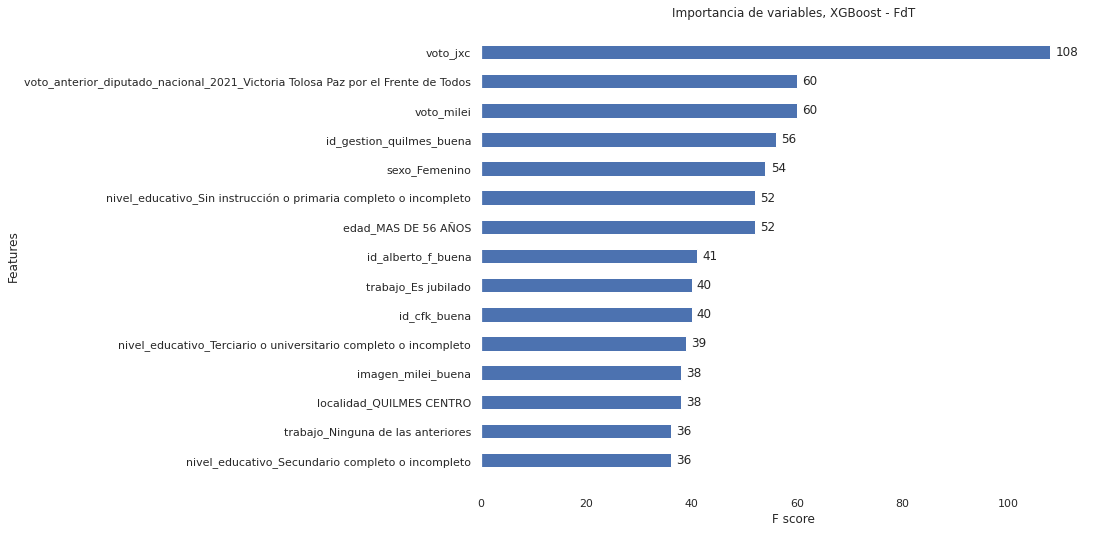

In [ ]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax, max_num_features=15, height=0.5)

plt.title('Importancia de variables, XGBoost - FdT')
plt.show()   # Display

In [ ]:
pip install shap > /dev/null

In [ ]:
import shap

Eje y: variables

Eje x: importancia en la predicccion del modelo (que es un 1 y un 0 la prediccion)

Colores: Valores altos (1) o bajos (0) de las variables. Son solo esos dos valores porque son todas dummies.

Ejemplo: El modelo predice intencion alta de voto FdT. La variable que mas peso tiene es intencion de voto jxc. Para valores altos de jxc (color rojo), la prediccion del modelo pasa a tener negativos para intencion FdT (los puntitos rojos de voto jxc estan en la mitad izquierda). 

Para los valores bajos de jxc (azul), tiene peso positivo para la prediccion. Es decir, intencion baja jxc = intencion alta fdt


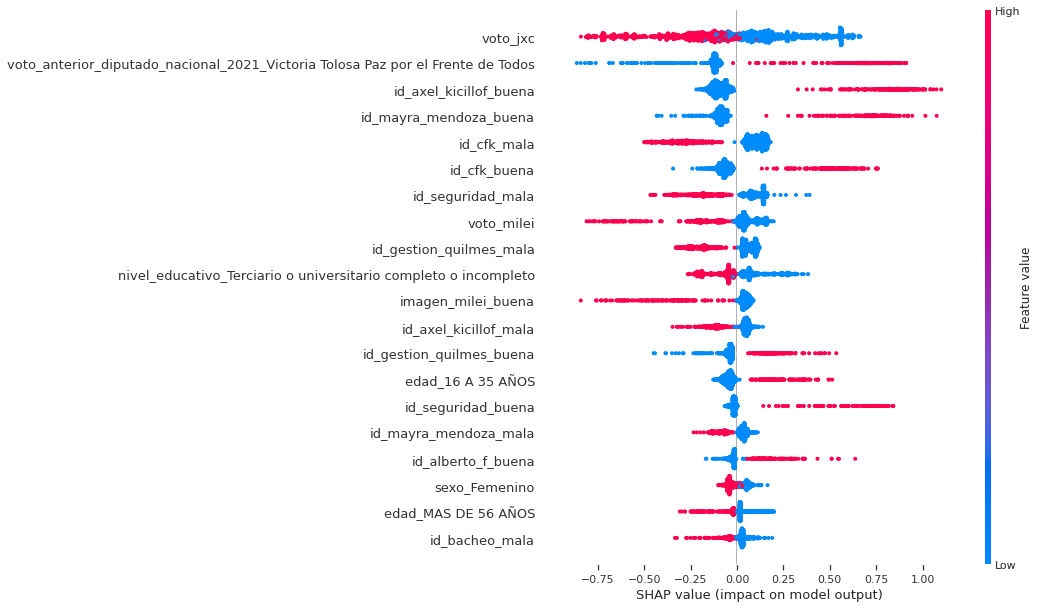

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

###JxC

Split

In [ ]:
X = df_o.drop('voto_jxc', axis=1)
y = df_o['voto_jxc']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo jxc auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo jxc auc: 0.737, 
 accuracy: 0.737, 
 matriz de confucion: 


array([[475, 172],
       [147, 417]])

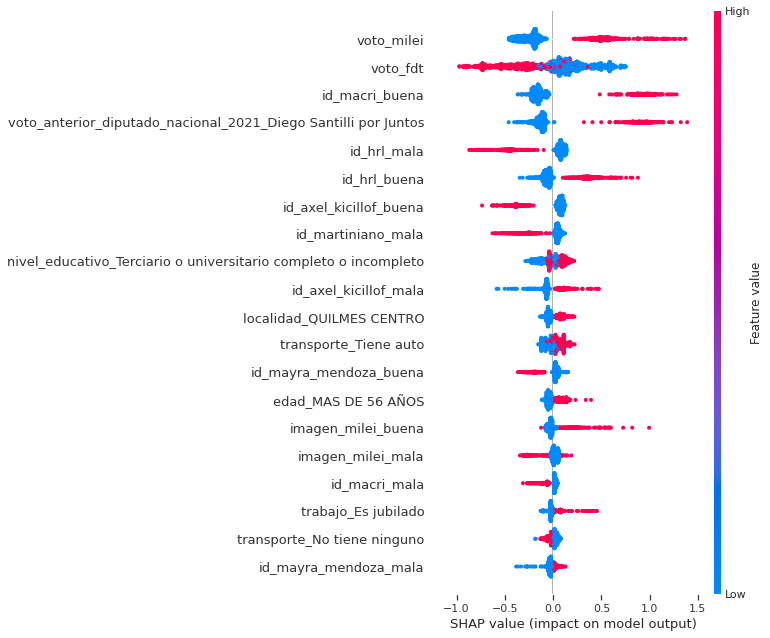

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,plot_size=(5,10))

###Milei

Split

In [ ]:
X = df_o.drop('voto_milei', axis=1)
y = df_o['voto_milei']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo milei auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo milei auc: 0.686, 
 accuracy: 0.789, 
 matriz de confucion: 


array([[804,  73],
       [182, 152]])

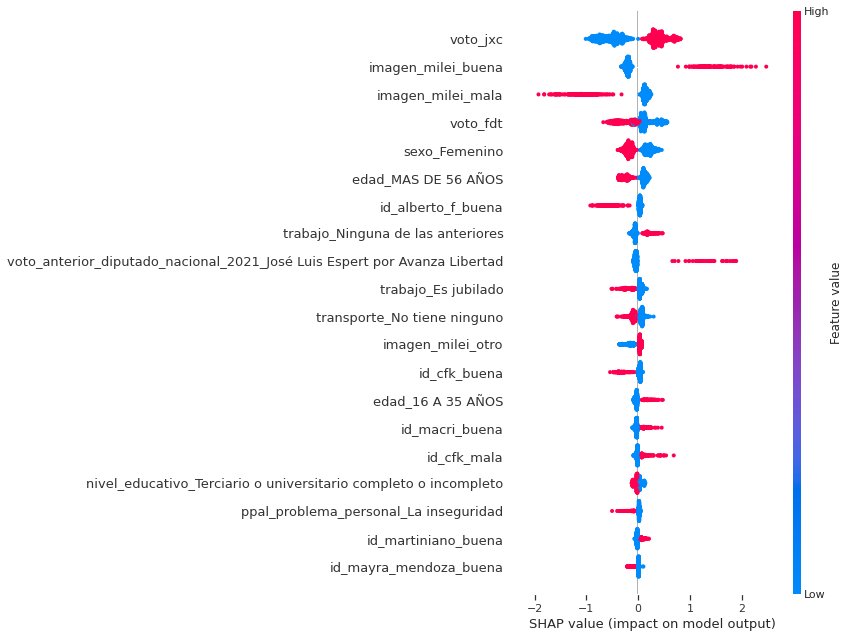

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,plot_size=(5,10))

### Resumen primera tanda de modelos


*   Se han generado modelos de prediccion para las intenciones de voto, teniendo en cuenta la totalidad de columnas que pasan el primer filtro (aka no son constantes ni datos personales que no suman info).
*   Para estos primeros modelos, se ha hecho un fillna basico, sin imputar valores por media, moda ni mediana.
*   Para FdT y JxC se podrian usar tanto la accuracy como el AUC como metrica de rendimiento de los modelos, ya que no hay desbalance del target sino que representa alrededor del 40%.
*   Las metricas andan alrededor de 0.75 para ambos.
*   Para Milei, el AUC baja a 0.7. El error para aquellos que tienen intencion alta es muy alto, causado por el desbalance de clase, ya que hay solo 27.81%
de casos con alta intencion para el candidato
*   No se han optimizado hiperparametros

## Modelos sin nulos

In [ ]:
df_2 = df.copy()

Nulos

In [ ]:
df_2.isna().sum()

sexo                                       0
edad                                       0
nivel_educativo                            0
localidad                                  0
trabajo                                    0
sector                                  3056
imagen_milei                            4088
voto_fdt                                   0
voto_jxc                                   0
voto_milei                                 0
transporte                                 0
grado_jxc_de_la_mesa                    3260
grado_fdt_de_la_mesa                    3260
voto_anterior_diputado_nacional_2021    3320
id_seguridad                            3320
id_bacheo                               3320
id_gestion_quilmes                      3320
id_hrl                                  3320
id_macri                                3320
id_martiniano                           3320
id_cfk                                  3320
id_alberto_f                            3320
id_axel_ki

Eliminamos columnas con nulos

In [ ]:
df_nn = df_2.dropna(subset= ['id_seguridad']) #nn = no nulos

In [ ]:
df_nn.isna().sum()

sexo                                       0
edad                                       0
nivel_educativo                            0
localidad                                  0
trabajo                                    0
sector                                  1505
imagen_milei                            1691
voto_fdt                                   0
voto_jxc                                   0
voto_milei                                 0
transporte                                 0
grado_jxc_de_la_mesa                    1427
grado_fdt_de_la_mesa                    1427
voto_anterior_diputado_nacional_2021       0
id_seguridad                               0
id_bacheo                                  0
id_gestion_quilmes                         0
id_hrl                                     0
id_macri                                   0
id_martiniano                              0
id_cfk                                     0
id_alberto_f                               0
id_axel_ki

In [ ]:
df_nn = df_nn.drop(columns=['ppal_responsable_del_problema','ppal_problema_personal','sector','imagen_milei'])

In [ ]:
df_nn = pd.get_dummies(df_nn, columns=['sexo', 'edad', 'nivel_educativo', 'localidad',
       'trabajo', 'transporte',
       'grado_jxc_de_la_mesa', 'grado_fdt_de_la_mesa',
       'voto_anterior_diputado_nacional_2021', 'id_seguridad', 'id_bacheo',
       'id_gestion_quilmes', 'id_hrl', 'id_macri', 'id_martiniano', 'id_cfk',
       'id_alberto_f', 'id_axel_kicillof', 'id_mayra_mendoza'],drop_first=True)

In [ ]:
df_nn.head()

,voto_fdt,voto_jxc,voto_milei,sexo_Masculino,edad_36 A 55 AÑOS,edad_MAS DE 56 AÑOS,nivel_educativo_Sin instrucción o primaria completo o incompleto,nivel_educativo_Terciario o universitario completo o incompleto,localidad_BERNAL OESTE,localidad_DON BOSCO,...,id_martiniano_mala,id_martiniano_neutro,id_cfk_mala,id_cfk_neutro,id_alberto_f_mala,id_alberto_f_neutro,id_axel_kicillof_mala,id_axel_kicillof_neutro,id_mayra_mendoza_mala,id_mayra_mendoza_neutro
0,1,1,0,1,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
4,1,0,0,1,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0


Balance

In [ ]:
print(f'Porcentaje de target FdT en base nn: {round(df_nn.voto_fdt.sum()/len(df_nn)*100,2)} %')
print(f'Porcentaje de target JxC en base nn: {round(df_nn.voto_jxc.sum()/len(df_nn)*100,2)} %')
print(f'Porcentaje de target Milei en base nn: {round(df_nn.voto_milei.sum()/len(df_nn)*100,2)} %')

Porcentaje de target FdT en base nn: 41.01 %
Porcentaje de target JxC en base nn: 48.7 %
Porcentaje de target Milei en base nn: 27.02 %


### FdT

Split

In [ ]:
X = df_nn.drop('voto_fdt', axis=1)
y = df_nn['voto_fdt']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo FdT auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo FdT auc: 0.868, 
 accuracy: 0.881, 
 matriz de confucion: 


array([[307,  23],
       [ 42, 175]])

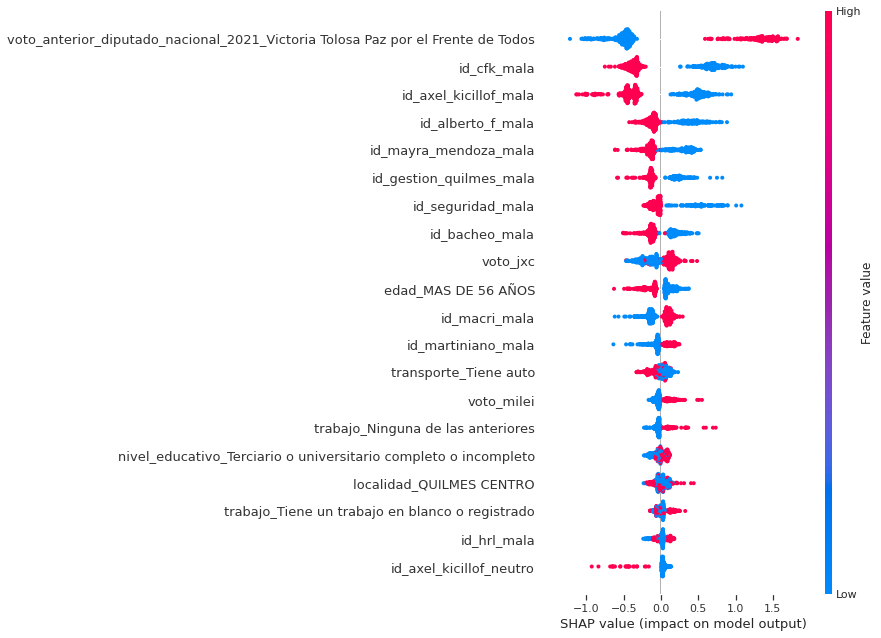

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,plot_size=(5,10))

### JxC

Split

In [ ]:
X = df_nn.drop('voto_jxc', axis=1)
y = df_nn['voto_jxc']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo jxc auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo jxc auc: 0.83, 
 accuracy: 0.83, 
 matriz de confucion: 


array([[232,  42],
       [ 51, 222]])

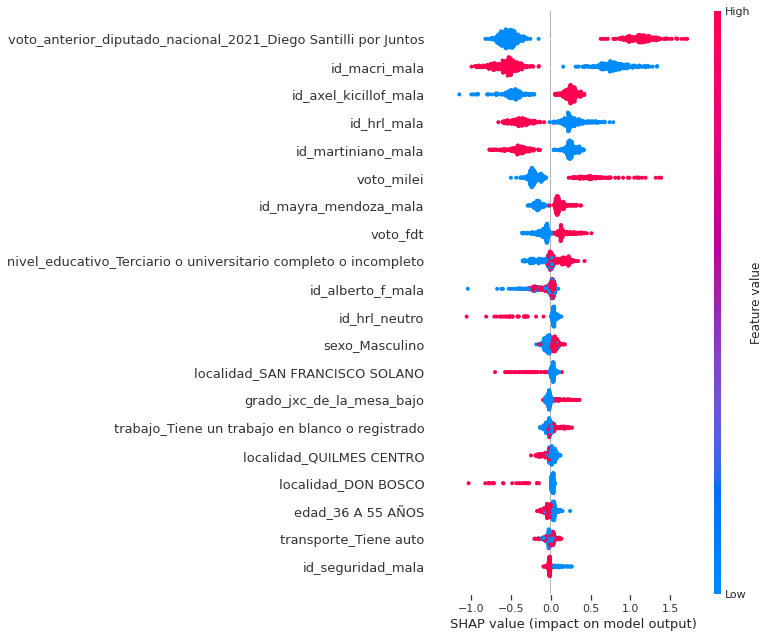

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,plot_size=(5,10))

### Milei

Split

In [ ]:
X = df_nn.drop('voto_milei', axis=1)
y = df_nn['voto_milei']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo milei auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo milei auc: 0.656, 
 accuracy: 0.77, 
 matriz de confucion: 


array([[361,  40],
       [ 86,  60]])

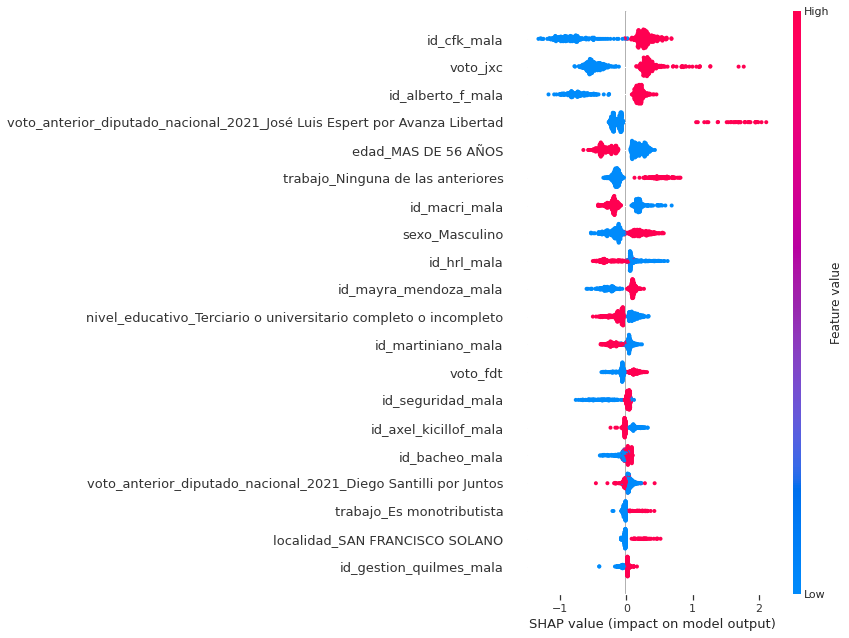

In [ ]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test,plot_size=(5,10))

###Resumen modelos sin nulos



*  Se eliminaron los nulos para las preguntas de imagenes (las agregadas por vicente en la segunda base). N = 2,731
*   Se eliminaron entonces las columans que tenian nulos en la primera base. Eran las de sector, problemas e imagen milei.
*   Por este motivo da bajo el modelo de milei
*   Para FdT y JxC mejora en gran valor los resultados. Llegando a +80%



## Modelos con FillNa MODA

Creamos copia

In [ ]:
df_m = df.copy()

Nulos 

In [ ]:
df_m.isna().sum()

sexo                                       0
edad                                       0
nivel_educativo                            0
localidad                                  0
trabajo                                    0
sector                                  3056
imagen_milei                            4088
voto_fdt                                   0
voto_jxc                                   0
voto_milei                                 0
transporte                                 0
grado_jxc_de_la_mesa                    3260
grado_fdt_de_la_mesa                    3260
voto_anterior_diputado_nacional_2021    3320
id_seguridad                            3320
id_bacheo                               3320
id_gestion_quilmes                      3320
id_hrl                                  3320
id_macri                                3320
id_martiniano                           3320
id_cfk                                  3320
id_alberto_f                            3320
id_axel_ki

Fill na con moda

In [ ]:
for col in df_m.columns:
  df_m[col] = df_m[col].fillna(df_m[col].mode()[0])

In [ ]:
df_m.isna().sum()

sexo                                    0
edad                                    0
nivel_educativo                         0
localidad                               0
trabajo                                 0
sector                                  0
imagen_milei                            0
voto_fdt                                0
voto_jxc                                0
voto_milei                              0
transporte                              0
grado_jxc_de_la_mesa                    0
grado_fdt_de_la_mesa                    0
voto_anterior_diputado_nacional_2021    0
id_seguridad                            0
id_bacheo                               0
id_gestion_quilmes                      0
id_hrl                                  0
id_macri                                0
id_martiniano                           0
id_cfk                                  0
id_alberto_f                            0
id_axel_kicillof                        0
id_mayra_mendoza                  

Dummies

In [ ]:
df_m = pd.get_dummies(df_m, columns=['sexo', 'edad', 'nivel_educativo', 'localidad',
       'trabajo', 'sector', 'imagen_milei', 'transporte', 'grado_jxc_de_la_mesa',
       'grado_fdt_de_la_mesa', 'voto_anterior_diputado_nacional_2021',
       'id_seguridad', 'id_bacheo', 'id_gestion_quilmes', 'id_hrl', 'id_macri',
       'id_martiniano', 'id_cfk', 'id_alberto_f', 'id_axel_kicillof',
       'id_mayra_mendoza', 'ppal_responsable_del_problema',
       'ppal_problema_personal'],drop_first=False)

In [ ]:
df_m.head()

,voto_fdt,voto_jxc,voto_milei,sexo_Femenino,sexo_Masculino,edad_16 A 35 AÑOS,edad_36 A 55 AÑOS,edad_MAS DE 56 AÑOS,nivel_educativo_Secundario completo o incompleto,nivel_educativo_Sin instrucción o primaria completo o incompleto,...,ppal_problema_personal_El acceso a empleo,ppal_problema_personal_El acceso a la educación,ppal_problema_personal_El acceso a la salud,ppal_problema_personal_El estado de las calles y veredas,ppal_problema_personal_La corrupción,ppal_problema_personal_La inseguridad,ppal_problema_personal_La limpieza y recolección de residuos,ppal_problema_personal_La situación económica,ppal_problema_personal_No desea contestar,ppal_problema_personal_Otro
0,1,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


### FdT

Split

In [ ]:
X = df_m.drop('voto_fdt', axis=1)
y = df_m['voto_fdt']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo FdT auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo FdT auc: 0.753, 
 accuracy: 0.763, 
 matriz de confucion: 


array([[581, 140],
       [147, 343]])

###JxC

Split

In [ ]:
X = df_m.drop('voto_jxc', axis=1)
y = df_m['voto_jxc']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo jxc auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo jxc auc: 0.728, 
 accuracy: 0.728, 
 matriz de confucion: 


array([[477, 170],
       [159, 405]])

###Milei

Split

In [ ]:
X = df_m.drop('voto_milei', axis=1)
y = df_m['voto_milei']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo milei auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo milei auc: 0.67, 
 accuracy: 0.788, 
 matriz de confucion: 


array([[818,  59],
       [198, 136]])

### Resumen modelos fill na moda



*   No se ven mejoras en el AUC comparado con los fillna 'otro'
*   Milei sigue dando peor que el resto



## Modelos binarizados

In [ ]:
df_b = df.copy()

In [ ]:
for imagen in ['imagen_milei','id_seguridad', 'id_bacheo', 'id_gestion_quilmes', 'id_hrl', 'id_macri','id_martiniano', 'id_cfk', 'id_alberto_f', 'id_axel_kicillof','id_mayra_mendoza']:
  lista = [1 if i == 'buena' else 0 for i in df_b[imagen]]

  df_b[imagen]=lista

Idem para grados

In [ ]:
for grado in ['grado_jxc_de_la_mesa','grado_fdt_de_la_mesa']:
  lista = [1 if i == 'alto' else 0 for i in df_b[grado]]

  df_b[grado]=lista

Fill na con "otro"

In [ ]:
df_b.fillna('otro',inplace=True)

Dummies

In [ ]:
df_b = pd.get_dummies(df_b, columns=['sexo', 'edad', 'nivel_educativo', 'localidad',
       'trabajo', 'sector', 'transporte', 'voto_anterior_diputado_nacional_2021', 'ppal_responsable_del_problema',
       'ppal_problema_personal'],drop_first=True)

In [ ]:
df_b.head()

,imagen_milei,voto_fdt,voto_jxc,voto_milei,grado_jxc_de_la_mesa,grado_fdt_de_la_mesa,id_seguridad,id_bacheo,id_gestion_quilmes,id_hrl,...,ppal_problema_personal_El acceso a la educación,ppal_problema_personal_El acceso a la salud,ppal_problema_personal_El estado de las calles y veredas,ppal_problema_personal_La corrupción,ppal_problema_personal_La inseguridad,ppal_problema_personal_La limpieza y recolección de residuos,ppal_problema_personal_La situación económica,ppal_problema_personal_No desea contestar,ppal_problema_personal_Otro,ppal_problema_personal_otro
0,0,1,1,0,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


### FdT

Split

In [ ]:
X = df_b.drop('voto_fdt', axis=1)
y = df_b['voto_fdt']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo FdT auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo FdT auc: 0.756, 
 accuracy: 0.766, 
 matriz de confucion: 


array([[584, 137],
       [146, 344]])

### JxC

Split

In [ ]:
X = df_b.drop('voto_jxc', axis=1)
y = df_b['voto_jxc']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo jxc auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo jxc auc: 0.735, 
 accuracy: 0.735, 
 matriz de confucion: 


array([[472, 175],
       [146, 418]])

### Milei

Split

In [ ]:
X = df_b.drop('voto_milei', axis=1)
y = df_b['voto_milei']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo jxc auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo jxc auc: 0.672, 
 accuracy: 0.786, 
 matriz de confucion: 


array([[813,  64],
       [195, 139]])

### Resumen binarizados:



*  Considerando nulos como "otros" o 0, los resultados no cambian




## Modelos con imagenes nulas imputadas por la media

Creamos copia

In [ ]:
df_a = df.copy()

Nulos 

In [ ]:
df_a.isna().sum()

sexo                                       0
edad                                       0
nivel_educativo                            0
localidad                                  0
trabajo                                    0
sector                                  3056
imagen_milei                            4088
voto_fdt                                   0
voto_jxc                                   0
voto_milei                                 0
transporte                                 0
grado_jxc_de_la_mesa                    3260
grado_fdt_de_la_mesa                    3260
voto_anterior_diputado_nacional_2021    3320
id_seguridad                            3320
id_bacheo                               3320
id_gestion_quilmes                      3320
id_hrl                                  3320
id_macri                                3320
id_martiniano                           3320
id_cfk                                  3320
id_alberto_f                            3320
id_axel_ki

Imagenes si tienen nulos

In [ ]:
for imagen in ['imagen_milei','id_seguridad', 'id_bacheo', 'id_gestion_quilmes', 'id_hrl', 'id_macri','id_martiniano', 'id_cfk', 'id_alberto_f', 'id_axel_kicillof','id_mayra_mendoza']:
  lista = [1 if i == 'buena' else 0 if i == 'mala' or i == 'neutro' else None for i in df_a[imagen]]

  df_a[imagen]=lista

Idem para grados

In [ ]:
for grado in ['grado_jxc_de_la_mesa','grado_fdt_de_la_mesa']:
  lista = [1 if i == 'alto'else 0 if i == 'bajo' or i== 'swing' else None for i in df_a[grado]]

  df_a[grado]=lista

Fill na con moda

In [ ]:
numericas = df_a.select_dtypes(include=['float'])

In [ ]:
for col in numericas.columns:
  df_a[col] = df_a[col].fillna(df_a[col].mean())

In [ ]:
string = df_a.select_dtypes(include=['object'])

In [ ]:
for col in string.columns:
  df_a[col] = df_a[col].fillna(df_a[col].mode()[0])

In [ ]:
df_a.isna().sum()

sexo                                    0
edad                                    0
nivel_educativo                         0
localidad                               0
trabajo                                 0
sector                                  0
imagen_milei                            0
voto_fdt                                0
voto_jxc                                0
voto_milei                              0
transporte                              0
grado_jxc_de_la_mesa                    0
grado_fdt_de_la_mesa                    0
voto_anterior_diputado_nacional_2021    0
id_seguridad                            0
id_bacheo                               0
id_gestion_quilmes                      0
id_hrl                                  0
id_macri                                0
id_martiniano                           0
id_cfk                                  0
id_alberto_f                            0
id_axel_kicillof                        0
id_mayra_mendoza                  

Dummies

In [ ]:
df_a = pd.get_dummies(df_a, columns=['sexo', 'edad', 'nivel_educativo', 'localidad',
       'trabajo', 'sector', 'transporte', 'grado_jxc_de_la_mesa',
       'grado_fdt_de_la_mesa', 'voto_anterior_diputado_nacional_2021', 'ppal_responsable_del_problema',
       'ppal_problema_personal'],drop_first=False)

In [ ]:
df_a.head()

,imagen_milei,voto_fdt,voto_jxc,voto_milei,id_seguridad,id_bacheo,id_gestion_quilmes,id_hrl,id_macri,id_martiniano,...,ppal_problema_personal_El acceso a empleo,ppal_problema_personal_El acceso a la educación,ppal_problema_personal_El acceso a la salud,ppal_problema_personal_El estado de las calles y veredas,ppal_problema_personal_La corrupción,ppal_problema_personal_La inseguridad,ppal_problema_personal_La limpieza y recolección de residuos,ppal_problema_personal_La situación económica,ppal_problema_personal_No desea contestar,ppal_problema_personal_Otro
0,0.35,1,1,0,0.00,0.00,1.00,1.00,0.00,0.00,...,0,0,0,0,0,1,0,0,0,0
1,0.35,0,1,0,0.00,0.00,0.00,1.00,1.00,1.00,...,0,0,0,0,0,1,0,0,0,0
2,0.00,0,0,0,0.18,0.40,0.37,0.52,0.38,0.53,...,0,0,0,0,0,0,0,1,0,0
3,0.35,0,0,0,0.00,0.00,0.00,1.00,1.00,1.00,...,0,0,0,0,0,1,0,0,0,0
4,0.00,1,0,0,1.00,0.00,1.00,0.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,0


### FdT

Split

In [ ]:
X = df_a.drop('voto_fdt', axis=1)
y = df_a['voto_fdt']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo FdT auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo FdT auc: 0.744, 
 accuracy: 0.756, 
 matriz de confucion: 


array([[579, 142],
       [154, 336]])

###JxC

Split

In [ ]:
X = df_a.drop('voto_jxc', axis=1)
y = df_a['voto_jxc']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo jxc auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo jxc auc: 0.731, 
 accuracy: 0.73, 
 matriz de confucion: 


array([[467, 180],
       [147, 417]])

###Milei

Split

In [ ]:
X = df_a.drop('voto_milei', axis=1)
y = df_a['voto_milei']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

In [ ]:
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo milei auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo milei auc: 0.694, 
 accuracy: 0.796, 
 matriz de confucion: 


array([[808,  69],
       [178, 156]])

### Resumen modelos fill na media



*   No se ven mejoras en el AUC comparado con los fillna por la media
*   Milei sigue dando peor que el resto



## Optimización de parametros con Random Forest y GridSearchCV

###FdT con FillNa otros

In [ ]:
X = df_o.drop('voto_fdt', axis=1)
y = df_o['voto_fdt']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

Manual

In [ ]:
for n_estimators in [100, 200, 300, 1000]:
    for criterion in ['gini', 'entropy']:
      for depth in [3, 5, 7, 9, 20]:
        clf = xgb.XGBClassifier(n_estimators=n_estimators, criterion=criterion, n_jobs=-1, random_state=42,max_depth=depth)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        auc = sk.metrics.roc_auc_score(y_test, y_pred)
        print(n_estimators, criterion,depth,'--> AUC:', auc)

Automatico con GridSearchCV

In [ ]:
import numpy as np 

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

clf = xgb.XGBClassifier(n_estimators=n_estimators, criterion=criterion,max_depth=max_depth, n_jobs=-1, random_state=42)
params = {
    'n_estimators': [100, 200, 300, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9, 20]
}

gs = sk.model_selection.GridSearchCV(clf, params,scoring='roc_auc', n_jobs=-1, verbose=2, cv=3)
gs.fit(X, y)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(criterion='entropy',
                                     max_depth=[10, 20, 30, 40, 50, 60, 70, 80,
                                                90, 100, 110],
                                     n_estimators=1000, n_jobs=-1,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 20],
                         'n_estimators': [100, 200, 300, 1000]},
             scoring='roc_auc', verbose=2)

In [ ]:
gs.best_estimator_

XGBClassifier(criterion='gini', max_depth=5, n_jobs=-1, random_state=42)

In [ ]:
best_grid = gs.best_estimator_
best_grid.fit(X_train, y_train)
# Predicting the Test set results
y_pred = best_grid.predict(X_test)

In [ ]:
auc = sk.metrics.roc_auc_score(y_test, y_pred)
round(auc,3)

0.753

### Resumen optimizacion:



*   No se notan mejoras



## Modelo Pipelines

 https://towardsdatascience.com/beginners-guide-to-xgboost-for-classification-problems-50f75aac5390

### Transformaciones

In [ ]:
df_p = df.copy()

Imagenes si tienen nulos

In [ ]:
for imagen in ['imagen_milei','id_seguridad', 'id_bacheo', 'id_gestion_quilmes', 'id_hrl', 'id_macri','id_martiniano', 'id_cfk', 'id_alberto_f', 'id_axel_kicillof','id_mayra_mendoza']:
  lista = [1 if i == 'buena' else 0 if i == 'mala' or i == 'neutro' else None for i in df_p[imagen]]

  df_p[imagen]=lista

Idem para grados

In [ ]:
for grado in ['grado_jxc_de_la_mesa','grado_fdt_de_la_mesa']:
  lista = [1 if i == 'alto'else 0 if i == 'bajo' or i== 'swing' else None for i in df_p[grado]]

  df_p[grado]=lista

### Pipelines

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)


numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean"))]
)

Split

In [ ]:
X = df_p.drop("voto_fdt", axis=1)
y = df_p.voto_fdt

Separamos columnas categoricas y numericas

In [ ]:
cat_cols = X.select_dtypes(exclude="number").columns
num_cols = X.select_dtypes(include="number").columns

In [ ]:
cat_cols

Index(['sexo', 'edad', 'nivel_educativo', 'localidad', 'trabajo', 'sector',
       'transporte', 'voto_anterior_diputado_nacional_2021',
       'ppal_responsable_del_problema', 'ppal_problema_personal'],
      dtype='object')

In [ ]:
num_cols

Index(['imagen_milei', 'voto_jxc', 'voto_milei', 'grado_jxc_de_la_mesa',
       'grado_fdt_de_la_mesa', 'id_seguridad', 'id_bacheo',
       'id_gestion_quilmes', 'id_hrl', 'id_macri', 'id_martiniano', 'id_cfk',
       'id_alberto_f', 'id_axel_kicillof', 'id_mayra_mendoza'],
      dtype='object')

Unimos Pipelines

In [ ]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

Aplicamos Pipeline final

In [ ]:
X_processed = full_processor.fit_transform(X)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=42
)

Corremos modelo simple

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
roc_auc_score(y_test, preds)

0.7649657576128166

Optimizamos parametros con GridSearchCV (Cross-validation)

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_processed, y_processed)

In [ ]:
grid_cv.best_score_

0.8374594513407159

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 7,
 'reg_lambda': 1,
 'scale_pos_weight': 3,
 'subsample': 0.8}

Segunda optimizacion

In [ ]:
# Insert the new fixed values to the grid
param_grid["scale_pos_weight"] = [3]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]

# Give new value ranges to other params
param_grid["gamma"] = [3, 5, 7]
param_grid["max_depth"] = [9, 15, 20]
param_grid["reg_lambda"] = [10, 30, 50]
param_grid["learning_rate"] = [0.3, 0.5, 0.7, 1]

In [ ]:
grid_cv_2 = GridSearchCV(xgb_cl, param_grid, 
                         cv=3, scoring="roc_auc", n_jobs=-1)

_ = grid_cv_2.fit(X_processed, y_processed)

Da peor, asi que nos quedamos con el grid_cv original

In [ ]:
grid_cv_2.best_score_

0.8335982515095605

Obtenemos parametros optimos

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'learning_rate': 0.01,
 'max_depth': 7,
 'reg_lambda': 1,
 'scale_pos_weight': 3,
 'subsample': 0.8}

Modelo final

In [ ]:
final_cl = xgb.XGBClassifier(
    **grid_cv.best_params_,
    objective="binary:logistic")

In [ ]:
from sklearn.metrics import roc_auc_score

_ = final_cl.fit(X_train, y_train)

preds = final_cl.predict(X_test)

In [ ]:
roc_auc_score(y_test, preds)

0.7368839427662957

### Resumen Pipelines



*   Se probó solo para FdT y no mejoró la compliance



# Seleccion de modelo final

Dados los resultados finales, elegimos el modelo que usa fillna('otros'), df_o

In [ ]:
df_o.head()

,voto_fdt,voto_jxc,voto_milei,sexo_Femenino,sexo_Masculino,edad_16 A 35 AÑOS,edad_36 A 55 AÑOS,edad_MAS DE 56 AÑOS,nivel_educativo_Secundario completo o incompleto,nivel_educativo_Sin instrucción o primaria completo o incompleto,nivel_educativo_Terciario o universitario completo o incompleto,localidad_BERNAL,localidad_BERNAL OESTE,localidad_DON BOSCO,localidad_EZPELETA,localidad_EZPELETA OESTE,localidad_LA RIBERA,localidad_QUILMES CENTRO,localidad_QUILMES OESTE,localidad_SAN FRANCISCO SOLANO,localidad_VILLA LA FLORIDA,trabajo_Es jubilado,trabajo_Es monotributista,trabajo_Ninguna de las anteriores,trabajo_Tiene un trabajo en blanco o registrado,sector_Sector privado,sector_Sector publico,sector_otro,imagen_milei_buena,imagen_milei_mala,imagen_milei_neutro,imagen_milei_otro,transporte_No tiene ninguno,transporte_Tiene ambos,transporte_Tiene auto,transporte_Tiene moto,grado_jxc_de_la_mesa_alto,grado_jxc_de_la_mesa_bajo,grado_jxc_de_la_mesa_otro,grado_jxc_de_la_mesa_swing,grado_fdt_de_la_mesa_alto,grado_fdt_de_la_mesa_bajo,grado_fdt_de_la_mesa_otro,grado_fdt_de_la_mesa_swing,voto_anterior_diputado_nacional_2021_Cynthia Hotton por Valores para mi país,voto_anterior_diputado_nacional_2021_Diego Santilli por Juntos,voto_anterior_diputado_nacional_2021_Florencio Randazzo por Vamos con Vos,voto_anterior_diputado_nacional_2021_José Luis Espert por Avanza Libertad,voto_anterior_diputado_nacional_2021_Nicolás del Caño por el Frente de Izquierda y de los Trabajadores,voto_anterior_diputado_nacional_2021_No sabe o no contesta,voto_anterior_diputado_nacional_2021_No votó o votó nulo,voto_anterior_diputado_nacional_2021_Victoria Tolosa Paz por el Frente de Todos,voto_anterior_diputado_nacional_2021_Votó en blanco,voto_anterior_diputado_nacional_2021_otro,id_seguridad_buena,id_seguridad_mala,id_seguridad_neutro,id_seguridad_otro,id_bacheo_buena,id_bacheo_mala,id_bacheo_neutro,id_bacheo_otro,id_gestion_quilmes_buena,id_gestion_quilmes_mala,id_gestion_quilmes_neutro,id_gestion_quilmes_otro,id_hrl_buena,id_hrl_mala,id_hrl_neutro,id_hrl_otro,id_macri_buena,id_macri_mala,id_macri_neutro,id_macri_otro,id_martiniano_buena,id_martiniano_mala,id_martiniano_neutro,id_martiniano_otro,id_cfk_buena,id_cfk_mala,id_cfk_neutro,id_cfk_otro,id_alberto_f_buena,id_alberto_f_mala,id_alberto_f_neutro,id_alberto_f_otro,id_axel_kicillof_buena,id_axel_kicillof_mala,id_axel_kicillof_neutro,id_axel_kicillof_otro,id_mayra_mendoza_buena,id_mayra_mendoza_mala,id_mayra_mendoza_neutro,id_mayra_mendoza_otro,ppal_responsable_del_problema_El Gobierno Municipal,ppal_responsable_del_problema_El Gobierno Nacional,ppal_responsable_del_problema_El Gobierno de la Provincia,ppal_responsable_del_problema_La oposición,ppal_responsable_del_problema_La sociedad,ppal_responsable_del_problema_Ninguno,ppal_responsable_del_problema_No desea contestar,ppal_responsable_del_problema_Otro,ppal_responsable_del_problema_Yo mismo,ppal_responsable_del_problema_otro,ppal_problema_personal_El acceso a empleo,ppal_problema_personal_El acceso a la educación,ppal_problema_personal_El acceso a la salud,ppal_problema_personal_El estado de las calles y veredas,ppal_problema_personal_La corrupción,ppal_problema_personal_La inseguridad,ppal_problema_personal_La limpieza y recolección de residuos,ppal_problema_personal_La situación económica,ppal_problema_personal_No desea contestar,ppal_problema_personal_Otro,ppal_problema_personal_otro
0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,

### FdT

Split

In [ ]:
X = df_o.drop('voto_fdt', axis=1)
y = df_o['voto_fdt']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

xgb_fdt = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_fdt.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo FdT auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo FdT auc: 0.754, 
 accuracy: 0.765, 
 matriz de confucion: 


array([[582, 134],
       [151, 344]])

Calculo de probabilidades

In [ ]:
df_probas = pd.DataFrame()

In [ ]:
df_probas['proba_f']=xgb_fdt.predict_proba(df_o[X_test.columns])[:,1]

###JxC

In [ ]:
X = df_o.drop('voto_jxc', axis=1)
y = df_o['voto_jxc']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

xgb_jxc = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_jxc.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo JxC auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo JxC auc: 0.739, 
 accuracy: 0.741, 
 matriz de confucion: 


array([[492, 155],
       [159, 405]])

Calculo de probabilidades

In [ ]:
df_probas['proba_j']=xgb_jxc.predict_proba(df_o[X_test.columns])[:,1]

### Milei

In [ ]:
X = df_o.drop('voto_milei', axis=1)
y = df_o['voto_milei']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

xgb_milei = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
y_pred = xgb_milei.predict(X_test)
auc = metrics.roc_auc_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

print(f'Resultado modelo JxC auc: {round(auc,3)}, \n accuracy: {round(accuracy,3)}, \n matriz de confucion: ')  
confusion_matrix(y_test,y_pred)

Resultado modelo JxC auc: 0.68, 
 accuracy: 0.788, 
 matriz de confucion: 


array([[808,  72],
       [185, 146]])

Calculo de probabilidades

In [ ]:
df_probas['proba_m']=xgb_milei.predict_proba(df_o[X_test.columns])[:,1]

## Group by concatenaciones

In [ ]:
df_probas.head()

,proba_f,proba_j,proba_m
0,0.11,0.93,0.44
1,0.09,0.63,0.80
2,0.11,0.75,0.57
3,0.13,0.92,0.15
4,0.16,0.82,0.67


### Creamos concatenacion de demograficas

Volvemos a categoricas originales

In [ ]:
#preparamos index como clave primaria para hacer el join 

df.reset_index(inplace=True)
df_probas.reset_index(inplace=True)

In [ ]:
df_final = df.merge(df_probas[['index','proba_m','proba_f','proba_j']], on='index', how='left')

In [ ]:
df_final.head()

,index,sexo,edad,nivel_educativo,localidad,trabajo,sector,imagen_milei,voto_fdt,voto_jxc,voto_milei,transporte,grado_jxc_de_la_mesa,grado_fdt_de_la_mesa,voto_anterior_diputado_nacional_2021,id_seguridad,id_bacheo,id_gestion_quilmes,id_hrl,id_macri,id_martiniano,id_cfk,id_alberto_f,id_axel_kicillof,id_mayra_mendoza,ppal_responsable_del_problema,ppal_problema_personal,proba_m,proba_f,proba_j
0,0,Femenino,16 A 35 AÑOS,Terciario o universitario completo o incompleto,BERNAL,Tiene un trabajo en blanco o registrado,Sector privado,None,0,1,0,No tiene ninguno,alto,bajo,Diego Santilli por Juntos,mala,mala,mala,buena,buena,buena,mala,mala,mala,mala,El Gobierno Municipal,La inseguridad,0.44,0.11,0.93
1,1,Femenino,16 A 35 AÑOS,Sin instrucción o primaria completo o incompleto,QUILMES OESTE,Tiene un trabajo en blanco o registrado,Sector privado,buena,0,0,1,No tiene ninguno,bajo,alto,Victoria Tolosa Paz por el Frente de Todos,mala,mala,mala,buena,buena,mala,mala,mala,mala,mala,El Gobierno Nacional,La situación económica,0.80,0.09,0.63
2,2,Femenino,16 A 35 AÑOS,Sin instrucción o primaria completo o incompleto,QUILMES CENTRO,Es jubilado,NaN,buena,0,1,0,No tiene ninguno,None,None,No sabe o no contesta,mala,mala,mala,buena,buena,buena,mala,mala,mala,mala,El Gobierno Nacional,El acceso a empleo,0.57,0.11,0.75
3,3,Femenino,MAS DE 56 AÑOS,Terciario o universitario completo o incompleto,QUILMES CENTRO,Es jubilado,NaN,None,0,0,0,Tiene ambos,None,None,Diego Santilli por Juntos,mala,mala,mala,buena,buena,buena,mala,mala,mala,mala,El Gobierno Nacional,La inseguridad,0.15,0.13,0.92
4,4,Masculino,16 A 35 AÑOS,Secundario completo o incompleto,EZPELETA OESTE,Es monotributista,Sector publico,None,0,1,1,Tiene moto,swing,alto,Nicolás del Caño por el Frente de Izquierda y de los Trabajadores,mala,mala,mala,buena,buena,mala,buena,mala,mala,mala,El Gobierno Municipal,La situación económica,0.67,0.16,0.82


Sexo-educacion-trabajo

In [ ]:
df_final['s-e-t'] = df_final['sexo'].astype(str)+ '-' + df_final['nivel_educativo'].astype(str)+ '-'+ df_final['trabajo'].astype(str)

In [ ]:
df_grupo = df_final.groupby(['s-e-t'])['proba_f','proba_j','proba_m'].agg(['mean'])
df_grupo=df_grupo.droplevel(1,axis=1).sort_values('proba_f',ascending=False)

In [ ]:
df_grupo

,proba_f,proba_j,proba_m
s-e-t,,,
Femenino-Sin instrucción o primaria completo o incompleto-Es monotributista,0.58,0.47,0.29
Masculino-Sin instrucción o primaria completo o incompleto-Ninguna de las anteriores,0.55,0.41,0.35
Masculino-Sin instrucción o primaria completo o incompleto-Es monotributista,0.53,0.45,0.37
Femenino-Sin instrucción o primaria completo o incompleto-Tiene un trabajo en blanco o registrado,0.52,0.43,0.20
Femenino-Sin instrucción o primaria completo o incompleto-Ninguna de las anteriores,0.50,0.43,0.25
Masculino-Sin instrucción o primaria completo o incompleto-Tiene un trabajo en blanco o registrado,0.48,0.47,0.34
Masculino-Secundario completo o incompleto-Tiene un trabajo en blanco o registrado,0.48,0.40,0.34
Femenino-Secundario completo o incompleto-Tiene un trabajo en blanco o registrado,0.47,0.41,0.23
Femenino-Secundario completo o incompleto-Es monotributista,0.46,0.42,0.25


Sexo-educacion-trabajo-edad

In [ ]:
df_final['e-e-s-t'] = df_final['edad'].astype(str)+ '-' + df_final['nivel_educativo'].astype(str)+ '-'+ df_final['sexo'].astype(str)+ '-'+ df_final['trabajo'].astype(str)

In [ ]:
df_grupo = df_final.groupby(['e-e-s-t'])['proba_f','proba_j','proba_m'].agg(['mean','count'])
df_grupo=df_grupo.droplevel(1,axis=1)
df_grupo.columns = ['fdt_proba','fdt_count','jxc_proba','jxc_count','m_proba','m_count']

In [ ]:
df_grupo.sort_values('fdt_proba',ascending=False)

,fdt_proba,fdt_count,jxc_proba,jxc_count,m_proba,m_count
e-e-s-t,,,,,,
MAS DE 56 AÑOS-Sin instrucción o primaria completo o incompleto-Femenino-Es monotributista,0.65,6,0.38,6,0.10,6
16 A 35 AÑOS-Sin instrucción o primaria completo o incompleto-Femenino-Ninguna de las anteriores,0.59,21,0.45,21,0.26,21
16 A 35 AÑOS-Sin instrucción o primaria completo o incompleto-Masculino-Ninguna de las anteriores,0.58,25,0.49,25,0.46,25
16 A 35 AÑOS-Sin instrucción o primaria completo o incompleto-Femenino-Es monotributista,0.57,6,0.49,6,0.44,6
16 A 35 AÑOS-Sin instrucción o primaria completo o incompleto-Masculino-Tiene un trabajo en blanco o registrado,0.57,12,0.58,12,0.56,12
...,...,...,...,...,...,...
MAS DE 56 AÑOS-Terciario o universitario completo o incompleto-Masculino-Ninguna de las anteriores,0.34,37,0.50,37,0.29,37
36 A 55 AÑOS-Terciario o universitario completo o incompleto-Masculino-Ninguna de las anteriores,0.33,80,0.50,80,0.42,80
MAS DE 56 AÑOS-Terciario o universitario completo o incompleto-Femenino-Es jubilado,0.32,371,0.60,371,0.18,371


Sexo-educacion-trabajo-edad-transporte

In [ ]:
df_final['e-e-s-t-t'] = df_final['edad'].astype(str)+ '-' + df_final['nivel_educativo'].astype(str)+ '-'+ df_final['sexo'].astype(str)+ '-'+ df_final['trabajo'].astype(str) + '-'+ df_final['transporte'].astype(str)

In [ ]:
df_grupo = df_final.groupby(['e-e-s-t-t'])['proba_f','proba_j','proba_m'].agg(['mean','count'])
df_grupo=df_grupo.droplevel(1,axis=1)

In [ ]:
df_grupo.columns = ['1','2','3','4','5','6']
df_grupo.sort_values('1',ascending=False).head(10)

# Lectura base madre y joins

## Lectura y arreglos

In [ ]:
bm = pd.read_excel('/content/drive/MyDrive/Politik/Files/BM - QUILMES.xlsx')

In [ ]:
bm.head()

,Pais,Provincia,Departamento,Ciudad,Apellido,Nombre,Nombre completo,Sexo,Nro Documento,Nro CUIL,Fecha de Nacimiento,Edad,Nacionalidad,Direccion Completa,Calle,Nro,Depto,Piso,Codigo Postal,Latitud,Longitud,Te Fijo,Te Movil,Email,Movilidad,Nivel Educativo,Planes Sociales,Profesión,Ingreso Total,Categoria Monotributo,Actividad Económica,Actividad 1,Actividad 2,Actividad 3,Empleador 1,Empleador 2,Empleador 3,Cuit Empledor 1,Cuit Empleador 2,Cuit Empleador 3,Sueldo 1,Sueldo 2,Sueldo 3,Tipo Ingreso,Condición Laboral,Disrito Electoral,Seccion Electoral,Circuito Electoral,Escuela Electoral,Mesa Electoral,Voto Paso 13,Voto General 13,Voto Paso 15,Voto General 15,Voto Ballotage 15,Voto Paso 17,Voto General 17,Afiliacion Partidaria
0,Argentina,Buenos Aires,Quilmes,San Francisco Solano,Frutos,Carlos Gastón,Carlos Gastón Frutos,M,35114088,20351140888,1989-12-19,30,Argentina,CALLE 821 2251,CALLE 821,2251,NaN,NaN,1881,-34.78,-58.31,1142127840.00,NaN,gastondesolano.-@hotmail.com,Transporte Público,NaN,NaN,Empleado,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buenos Aires,QUILMES,788C,4659.00,1024.00,False,True,True,True,True,True,True,NaN
1,Argentina,Buenos Aires,Quilmes,Quilmes,Garcia,Monica Beatriz,Monica Beatriz Garcia,F,11885558,27118855588,1956-01-05,64,Argentina,9 DE JULIO 222 3 A,9 DE JULIO,222,03:00:00,NaN,1878,-34.72,-58.26,NaN,5491162512003.00,nietihw2012@hotmail.com.ar,Transporte Público,Universitario Incompleto,NaN,Conserje,12800.00,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo,Jubilado,Buenos Aires,QUILMES,783,9925.00,22.00,False,True,False,False,False,True,True,NaN
2,Argentina,Buenos Aires,Quilmes,Quilmes,Almiron,Paula Graciela,Paula Graciela Almiron,F,28649983,27286499835,1981-02-24,39,Argentina,CALLE 895 1479,CALLE 895,1479,NaN,NaN,1879,-34.72,-58.26,NaN,5491166559781.00,NaN,Transporte Público,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buenos Aires,QUILMES,788C,4658.00,997.00,False,True,True,True,True,True,True,PARTIDO JUSTICIALISTA
3,Argentina,Buenos Aires,Quilmes,Quilmes,Mareco,Luis Ezequiel,Luis Ezequiel Mareco,M,40472178,20404721780,1997-06-03,23,Argentina,J V GONZALEZ 2885,J V GONZALEZ,2885,NaN,NaN,1879,-34.72,-58.26,NaN,5491138614085.00,luismareco5@gmail.com,Transporte Público,Secundario Incompleto,NaN,Estudiante,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buenos Aires,QUILMES,785A,4569.00,305.00,False,False,True,True,True,True,True,NaN
4,Argentina,Buenos Aires,Quilmes,San Francisco Solano,Lazo,Silvia Verónica,Silvia Verónica Lazo,F,23817606,27238176064,1974-02-04,46,Argentina,894 3160,894,3160,NaN,NaN,1881,-34.78,-58.31,NaN,5491135412730.00,sylvialazo-@hotmail.com,Transporte Público,Secundario Completo,NaN,Empleado,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monotributista,Buenos Aires,QUILMES,788A,4646.00,836.00,False,True,True,True,True,True,True,PARTIDO JUSTICIALISTA


In [ ]:
bm.columns

Index(['Pais', 'Provincia', 'Departamento', 'Ciudad', 'Apellido', 'Nombre',
       'Nombre completo', 'Sexo', 'Nro Documento', 'Nro CUIL',
       'Fecha de Nacimiento', 'Edad', 'Nacionalidad', 'Direccion Completa',
       'Calle', 'Nro', 'Depto', 'Piso', 'Codigo Postal', 'Latitud', 'Longitud',
       'Te Fijo', 'Te Movil', 'Email', 'Movilidad', 'Nivel Educativo',
       'Planes Sociales', 'Profesión', 'Ingreso Total',
       'Categoria Monotributo', 'Actividad Económica', 'Actividad 1',
       'Actividad 2', 'Actividad 3', 'Empleador 1', 'Empleador 2',
       'Empleador 3', 'Cuit Empledor 1', 'Cuit Empleador 2',
       'Cuit Empleador 3', 'Sueldo 1', 'Sueldo 2', 'Sueldo 3', 'Tipo Ingreso',
       'Condición Laboral', 'Disrito Electoral', 'Seccion Electoral',
       'Circuito Electoral', 'Escuela Electoral', 'Mesa Electoral',
       'Voto Paso 13', 'Voto General 13', 'Voto Paso 15', 'Voto General 15',
       'Voto Ballotage 15', 'Voto Paso 17', 'Voto General 17',
       'Afiliacion Part

In [ ]:
bm.shape

(549404, 58)

In [ ]:
bm.isna().sum()

Pais                          0
Provincia                     0
Departamento                  0
Ciudad                        0
Apellido                      0
Nombre                        0
Nombre completo               0
Sexo                          0
Nro Documento                 0
Nro CUIL                      0
Fecha de Nacimiento           0
Edad                          0
Nacionalidad                266
Direccion Completa            9
Calle                         9
Nro                         277
Depto                    497877
Piso                     549404
Codigo Postal             70172
Latitud                     277
Longitud                    277
Te Fijo                  449380
Te Movil                 126261
Email                    268229
Movilidad                196874
Nivel Educativo          312617
Planes Sociales          549016
Profesión                297178
Ingreso Total            336248
Categoria Monotributo         0
Actividad Económica      483820
Activida

### Edad

In [ ]:
demos = ['Sexo','Edad','Nivel Educativo','Profesión','Condición Laboral']

In [ ]:
bm[demos].dtypes

Sexo                 object
Edad                  int64
Nivel Educativo      object
Profesión            object
Condición Laboral    object
dtype: object

In [ ]:
len(bm[bm.Edad<16])

92764

In [ ]:
bm['edad_v2'] = ['16 A 35 AÑOS' if x >= 16 and x <= 35 else '36 A 55 AÑOS' if x>= 36 and x<=56 else 'MAS DE 56 AÑOS' if x>56 else None for x in bm.Edad]

In [ ]:
bm['edad_v2'].isna().sum()

92764

In [ ]:
bm['edad_v2'].value_counts()

16 A 35 AÑOS      171091
36 A 55 AÑOS      158208
MAS DE 56 AÑOS    127341
Name: edad_v2, dtype: int64

### Educación

In [ ]:
df.nivel_educativo.value_counts()

Terciario o universitario completo o incompleto     3371
Secundario completo o incompleto                    1982
Sin instrucción o primaria completo o incompleto     698
Name: nivel_educativo, dtype: int64

In [ ]:
bm['Nivel Educativo'].isna().sum()

312617

In [ ]:
bm['Nivel Educativo'].value_counts()

Secundario Incompleto       58358
Secundario Completo         57124
Primario Completo           53450
Primario Incompleto         24590
Terciario Completo          14217
Universitario Completo      12570
Universitario Incompleto    11029
Terciario Incompleto         5141
Posgrado Completo             238
Posgrado Incompleto            70
Name: Nivel Educativo, dtype: int64

In [ ]:
bm['educacion_v2'] = ['Terciario o universitario completo o incompleto' if x in ['Universitario Incompleto','Universitario Completo','Terciario Completo','Terciario Incompleto','Posgrado Completo', 'Posgrado Incompleto'] 
                      else 'Secundario completo o incompleto' if x == 'Secundario Completo' or x == 'Secundario Incompleto'
                      else 'Sin instrucción o primaria completo o incompleto' if x =='Primario Completo' or x == 'Primario Incompleto' 
                      else None 
                      for x in bm['Nivel Educativo'] ]

In [ ]:
bm['educacion_v2'].value_counts()

Secundario completo o incompleto                    115482
Sin instrucción o primaria completo o incompleto     78040
Terciario o universitario completo o incompleto      43265
Name: educacion_v2, dtype: int64

In [ ]:
bm['educacion_v2'].isna().sum()

312617

### Sexo

In [ ]:
bm.Sexo.isna().sum()

0

In [ ]:
bm.Sexo.value_counts()

F    277632
M    271772
Name: Sexo, dtype: int64

In [ ]:
bm['sexo_v2']= ['Femenino' if x == 'F' else 'Masculino' for x in bm.Sexo]

In [ ]:
bm.sexo_v2.value_counts()

Femenino     277632
Masculino    271772
Name: sexo_v2, dtype: int64

### Trabajo

In [ ]:
bm['Condición Laboral'].isna().sum()

303380

In [ ]:
bm['Condición Laboral'].value_counts()

Empleado                                     118674
Jubilado                                      78156
Monotributista                                25424
Autónomo                                       6034
Empleado;Monotributista                        5766
Empleado;Jubilado                              3889
Jubilado;Monotributista                        3076
Empleado;Autónomo                              2107
Jubilado;Autónomo                              1742
Monotributista;Autónomo                         362
Empleado;Monotributista;Autónomo                292
Empleado;Jubilado;Autónomo                      233
Empleado;Jubilado;Monotributista                156
Jubilado;Monotributista;Autónomo                 90
Empleado;Jubilado;Monotributista;Autónomo        23
Name: Condición Laboral, dtype: int64

In [ ]:
df.trabajo.value_counts()

Tiene un trabajo en blanco o registrado    2385
Es jubilado                                1497
Ninguna de las anteriores                  1400
Es monotributista                           769
Name: trabajo, dtype: int64

In [ ]:
bm['trabajo_v2']=[x.split(';')[0] if x!='otro' else None for x in bm['Condición Laboral'].fillna('otro')]

In [ ]:
bm['trabajo_v2'].value_counts()

Empleado          131140
Jubilado           83064
Monotributista     25786
Autónomo            6034
Name: trabajo_v2, dtype: int64

In [ ]:
bm['trabajo_v2'] = [ 'Tiene un trabajo en blanco o registrado' if x == 'Empleado' 
                    else 'Es jubilado' if x== 'Jubilado' 
                    else 'Es monotributista' if x == 'Monotributista' 
                    else 'Ninguna de las anteriores' if x == 'Autónomo'
                    else None 
                    for x in bm['trabajo_v2']] 

In [ ]:
bm['trabajo_v2'].value_counts()

Tiene un trabajo en blanco o registrado    131140
Es jubilado                                 83064
Es monotributista                           25786
Ninguna de las anteriores                    6034
Name: trabajo_v2, dtype: int64

In [ ]:
bm['trabajo_v2'].isna().sum()

303380

###Movilidad

In [ ]:
bm['Movilidad'].isna().sum()

196874

In [ ]:
bm['Movilidad'].value_counts()

Transporte Público              279338
Auto                             59253
Auto;Moto                         8209
Moto                              5719
Auto;Transporte Público             10
Auto;Moto;Transporte Público         1
Name: Movilidad, dtype: int64

In [ ]:
df_final['transporte'].value_counts()

Tiene auto          2814
No tiene ninguno    2726
Tiene ambos          312
Tiene moto           199
Name: transporte, dtype: int64

In [ ]:
bm['movilidad_v2'] = ['Tiene auto' if x in ['Auto','Auto;Transporte Público'] 
                      else 'Tiene moto' if x in ['Moto'] 
                      else 'Tiene ambos' if x in ['Auto;Moto','Auto;Moto;Transporte Público']
                      else 'No tiene ninguno' if x  == 'Transporte Público'
                      else None for x in bm['Movilidad']]

In [ ]:
bm['movilidad_v2'].value_counts()

No tiene ninguno    279338
Tiene auto           59263
Tiene ambos           8210
Tiene moto            5719
Name: movilidad_v2, dtype: int64

##Joins

### Observamos nulos

Nulos en alguna de las 3 variables (sexo no tiene nulos)

In [ ]:
len(bm.dropna(subset=['trabajo_v2','edad_v2','educacion_v2','movilidad_v2']))

108574

In [ ]:
len(bm.dropna(subset=['trabajo_v2','edad_v2','educacion_v2']))

128902

In [ ]:
len(bm.dropna(subset=['trabajo_v2','edad_v2']))

244722

In [ ]:
len(bm.dropna(subset=['edad_v2','educacion_v2']))

229967

Nulos en alguna de 2 de las 4 variables

In [ ]:
nulos = ['trabajo_v2','edad_v2','educacion_v2','movilidad_v2']

for x in nulos:
  for y in nulos:
    if x==y:
      pass
    else:
      print(f'Casos completos segun {x} y {y} : {len(bm.dropna(subset=[x,y]))}')

Casos completos segun trabajo_v2 y edad_v2 : 244722
Casos completos segun trabajo_v2 y educacion_v2 : 129039
Casos completos segun trabajo_v2 y movilidad_v2 : 200075
Casos completos segun edad_v2 y trabajo_v2 : 244722
Casos completos segun edad_v2 y educacion_v2 : 229967
Casos completos segun edad_v2 y movilidad_v2 : 340869
Casos completos segun educacion_v2 y trabajo_v2 : 129039
Casos completos segun educacion_v2 y edad_v2 : 229967
Casos completos segun educacion_v2 y movilidad_v2 : 180871
Casos completos segun movilidad_v2 y trabajo_v2 : 200075
Casos completos segun movilidad_v2 y edad_v2 : 340869
Casos completos segun movilidad_v2 y educacion_v2 : 180871


### Creamos columnas finales

Sexo-educacion-trabajo-edad-Movilidad

In [ ]:
df_final['e-e-s-t-m'] = df_final['edad'].astype(str)+ '-' + df_final['nivel_educativo'].astype(str)+ '-'+ df_final['sexo'].astype(str)+ '-'+ df_final['trabajo'].astype(str)+ '-'+ df_final['transporte'].astype(str)

In [ ]:
probas_0 = df_final.groupby(['e-e-s-t-m'])['proba_f','proba_j','proba_m'].agg(['mean'])
probas_0=probas_0.droplevel(1,axis=1)

In [ ]:
probas_0.reset_index(inplace=True)

In [ ]:
probas_0.columns = ['concat_0', 'proba_f_0', 'proba_j_0', 'proba_m_0']

In [ ]:
probas_0.sort_values('proba_f_0',ascending=False).head(50)

,concat_0,proba_f_0,proba_j_0,proba_m_0
134,36 A 55 AÑOS-Terciario o universitario completo o incompleto-Femenino-Es jubilado-Tiene ambos,0.99,0.06,0.01
175,MAS DE 56 AÑOS-Secundario completo o incompleto-Femenino-Tiene un trabajo en blanco o registrado-Tiene ambos,0.98,0.20,0.07
229,MAS DE 56 AÑOS-Terciario o universitario completo o incompleto-Femenino-Ninguna de las anteriores-Tiene moto,0.97,0.11,0.01
221,MAS DE 56 AÑOS-Terciario o universitario completo o incompleto-Femenino-Es jubilado-Tiene moto,0.95,0.23,0.07
193,MAS DE 56 AÑOS-Sin instrucción o primaria completo o incompleto-Femenino-Es jubilado-Tiene ambos,0.92,0.12,0.07
197,MAS DE 56 AÑOS-Sin instrucción o primaria completo o incompleto-Femenino-Es monotributista-Tiene auto,0.87,0.41,0.08
223,MAS DE 56 AÑOS-Terciario o universitario completo o incompleto-Femenino-Es monotributista-Tiene ambos,0.75,0.26,0.06
127,36 A 55 AÑOS-Sin instrucción o primaria completo o incompleto-Masculino-Ninguna de las anteriores-Tiene ambos,0.71,0.43,0.12
202,MAS DE 56 AÑOS-Sin instrucción o primaria completo o incompleto-Femenino-Tiene un trabajo en blanco o registrado-Tiene ambos,0.68,0.27,0.08
213,MAS DE 56 AÑOS-Sin instrucción o primaria completo o incompleto-Masculino-Ninguna de las anteriores-Tiene auto,0.67,0.45,0.28


Sexo-educacion-trabajo-edad

In [ ]:
df_final['e-e-s-t'] = df_final['edad'].astype(str)+ '-' + df_final['nivel_educativo'].astype(str)+ '-'+ df_final['sexo'].astype(str)+ '-'+ df_final['trabajo'].astype(str)

In [ ]:
probas_1 = df_final.groupby(['e-e-s-t'])['proba_f','proba_j','proba_m'].agg(['mean'])
probas_1=probas_1.droplevel(1,axis=1)

In [ ]:
probas_1.reset_index(inplace=True)

In [ ]:
probas_1.columns = ['concat', 'proba_f', 'proba_j', 'proba_m']

In [ ]:
probas_1.sort_values('proba_f',ascending=False).head(15)

,concat,proba_f,proba_j,proba_m
57,MAS DE 56 AÑOS-Sin instrucción o primaria completo o incompleto-Femenino-Es monotributista,0.62,0.39,0.08
10,16 A 35 AÑOS-Sin instrucción o primaria completo o incompleto-Femenino-Ninguna de las anteriores,0.59,0.46,0.25
9,16 A 35 AÑOS-Sin instrucción o primaria completo o incompleto-Femenino-Es monotributista,0.59,0.50,0.42
14,16 A 35 AÑOS-Sin instrucción o primaria completo o incompleto-Masculino-Ninguna de las anteriores,0.59,0.49,0.46
38,36 A 55 AÑOS-Sin instrucción o primaria completo o incompleto-Masculino-Ninguna de las anteriores,0.56,0.40,0.38
15,16 A 35 AÑOS-Sin instrucción o primaria completo o incompleto-Masculino-Tiene un trabajo en blanco o registrado,0.55,0.57,0.55
61,MAS DE 56 AÑOS-Sin instrucción o primaria completo o incompleto-Masculino-Es monotributista,0.55,0.36,0.19
36,36 A 55 AÑOS-Sin instrucción o primaria completo o incompleto-Masculino-Es jubilado,0.55,0.46,0.27
8,16 A 35 AÑOS-Sin instrucción o primaria completo o incompleto-Femenino-Es jubilado,0.55,0.50,0.30
62,MAS DE 56 AÑOS-Sin instrucción o primaria completo o incompleto-Masculino-Ninguna de las anteriores,0.54,0.38,0.21


Creamos primary key de combinacion demograficas en Base madre

In [ ]:
bm['concat_0'] = bm['edad_v2'].astype(str)+ '-' + bm['educacion_v2'].astype(str)+ '-'+ bm['sexo_v2'].astype(str)+ '-' + bm['trabajo_v2'].astype(str)+ '-'+ bm['movilidad_v2'].astype(str)

Join 0

In [ ]:
base_final = bm.merge(probas_0,on='concat_0',how='left')

In [ ]:
len(base_final.dropna(subset=['proba_f_0']))

107934

Join 1

In [ ]:
base_final['concat'] = bm['edad_v2'].astype(str)+ '-' + bm['educacion_v2'].astype(str)+ '-'+ bm['sexo_v2'].astype(str)+ '-'+ bm['trabajo_v2'].astype(str)

In [ ]:
base_final = base_final.merge(probas_1,on='concat',how='left')

In [ ]:
len(base_final.dropna(subset=['proba_f']))

128902

In [ ]:
base_final.head()

,Pais,Provincia,Departamento,Ciudad,Apellido,Nombre,Nombre completo,Sexo,Nro Documento,Nro CUIL,Fecha de Nacimiento,Edad,Nacionalidad,Direccion Completa,Calle,Nro,Depto,Piso,Codigo Postal,Latitud,Longitud,Te Fijo,Te Movil,Email,Movilidad,Nivel Educativo,Planes Sociales,Profesión,Ingreso Total,Categoria Monotributo,Actividad Económica,Actividad 1,Actividad 2,Actividad 3,Empleador 1,Empleador 2,Empleador 3,Cuit Empledor 1,Cuit Empleador 2,Cuit Empleador 3,Sueldo 1,Sueldo 2,Sueldo 3,Tipo Ingreso,Condición Laboral,Disrito Electoral,Seccion Electoral,Circuito Electoral,Escuela Electoral,Mesa Electoral,Voto Paso 13,Voto General 13,Voto Paso 15,Voto General 15,Voto Ballotage 15,Voto Paso 17,Voto General 17,Afiliacion Partidaria,edad_v2,educacion_v2,sexo_v2,trabajo_v2,movilidad_v2,concat_0,concat,proba_f_0,proba_j_0,proba_m_0,proba_f,proba_j,proba_m
0,Argentina,Buenos Aires,Quilmes,San Francisco Solano,Frutos,Carlos Gastón,Carlos Gastón Frutos,M,35114088,20351140888,1989-12-19,30,Argentina,CALLE 821 2251,CALLE 821,2251,NaN,NaN,1881,-34.78,-58.31,1142127840.00,NaN,gastondesolano.-@hotmail.com,Transporte Público,NaN,NaN,Empleado,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buenos Aires,QUILMES,788C,4659.00,1024.00,False,True,True,True,True,True,True,NaN,16 A 35 AÑOS,None,Masculino,None,No tiene ninguno,16 A 35 AÑOS-None-Masculino-None-No tiene ninguno,16 A 35 AÑOS-None-Masculino-None,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,Buenos Aires,Quilmes,Quilmes,Garcia,Monica Beatriz,Monica Beatriz Garcia,F,11885558,27118855588,1956-01-05,64,Argentina,9 DE JULIO 222 3 A,9 DE JULIO,222,03:00:00,NaN,1878,-34.72,-58.26,NaN,5491162512003.00,nietihw2012@hotmail.com.ar,Transporte Público,Universitario Incompleto,NaN,Conserje,12800.00,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bajo,Jubilado,Buenos Aires,QUILMES,783,9925.00,22.00,False,True,False,False,False,True,True,NaN,MAS DE 56 AÑOS,Terciario o universitario completo o incompleto,Femenino,Es jubilado,No tiene ninguno,MAS DE 56 AÑOS-Terciario o universitario completo o incompleto-Femenino-Es jubilado-No tiene ninguno,MAS DE 56 AÑOS-Terciario o universitario completo o incompleto-Femenino-Es jubilado,0.30,0.60,0.19,0.32,0.60,0.18
2,Argentina,Buenos Aires,Quilmes,Quilmes,Almiron,Paula Graciela,Paula Graciela Almiron,F,28649983,27286499835,1981-02-24,39,Argentina,CALLE 895 1479,CALLE 895,1479,NaN,NaN,1879,-34.72,-58.26,NaN,5491166559781.00,NaN,Transporte Público,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buenos Aires,QUILMES,788C,4658.00,997.00,False,True,True,True,True,True,True,PARTIDO JUSTICIALISTA,36 A 55 AÑOS,None,Femenino,None,No tiene ninguno,36 A 55 AÑOS-None-Femenino-None-No tiene ninguno,36 A 55 AÑOS-None-Femenino-None,NaN,NaN,NaN,NaN,NaN,NaN
3,Argentina,Buenos Aires,Quilmes,Quilmes,Mareco,Luis Ezequiel,Luis Ezequiel Mareco,M,40472178,20404721780,1997-06-03,23,Argentina,J V GONZALEZ 2885,J V GONZALEZ,2885,NaN,NaN,1879,-34.72,-58.26,NaN,5491138614085.00,luismareco5@gmail.com,Transporte Público,Secundario Incompleto,NaN,Estudiante,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Buenos Aires,QUILMES,785A,4569.00,305.00,False,False,True,True,True,True,True,NaN,16 A 35 AÑOS,Secundario completo o incompleto,Masculino,None,No tiene ninguno,16 A 35 AÑOS-Secundario completo o incompleto-Masculino-None-No tiene ninguno,16 A 35 AÑOS-Secundario completo o incompleto-Masculino-None,NaN,NaN,NaN,NaN,NaN,NaN
4,Argentina,Buenos Aires,Quilmes,San Francisco Solano,Lazo,Silvia Verónica,Silvia Verónica Lazo,F,23817606,27238176064,1974-02-04,46,Argentina,894 3160,894,3160,NaN,NaN,1881,-34.78,-58.31,NaN,5491135412730.00,sylvialazo-@hotmail.com,Transporte Público,Secundario Completo,NaN,Empleado,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Monotributista,Buenos Aires,QUILMES,788A,4646.00,836.00,False,True,True,True,True,True,True,PARTIDO JUSTICIALISTA,36 A 55 AÑOS,Secundario completo o incompleto,Femenino,Es monotributista,No 

Join 2

Sexo-trabajo-edad

In [ ]:
df_final['ste'] = df_final['edad'].astype(str)+ '-' + df_final['sexo'].astype(str)+ '-'+ df_final['trabajo'].astype(str)

In [ ]:
probas_2 = df_final.groupby(['ste'])['proba_f','proba_j','proba_m'].agg(['mean'])
probas_2=probas_2.droplevel(1,axis=1)

In [ ]:
probas_2.reset_index(inplace=True)

In [ ]:
probas_2.columns = ['concat_2', 'proba_f_2', 'proba_j_2', 'proba_m_2']

Creamos primary key de combinacion demograficas en Base madre

In [ ]:
base_final['concat_2'] = base_final['edad_v2'].astype(str)+ '-'+ base_final['sexo_v2'].astype(str)+ '-'+ base_final['trabajo_v2'].astype(str)

In [ ]:
base_final = base_final.merge(probas_2,on='concat_2',how='left')

Join 3

Sexo-trabajo-edad

In [ ]:
df_final['see'] = df_final['edad'].astype(str)+ '-' + df_final['sexo'].astype(str)+ '-'+ df_final['nivel_educativo'].astype(str)

In [ ]:
probas_3 = df_final.groupby(['see'])['proba_f','proba_j','proba_m'].agg(['mean'])
probas_3=probas_3.droplevel(1,axis=1)

In [ ]:
probas_3.reset_index(inplace=True)

In [ ]:
probas_3.columns = ['concat_3', 'proba_f_3', 'proba_j_3', 'proba_m_3']

Creamos primary key de combinacion demograficas en Base madre

In [ ]:
base_final['concat_3'] = base_final['edad_v2'].astype(str)+ '-'+ base_final['sexo_v2'].astype(str)+ '-'+ base_final['educacion_v2'].astype(str)

In [ ]:
base_final = base_final.merge(probas_3,on='concat_3',how='left')

Export solo de concat y DNI para cruzar luego

In [ ]:
base_final.columns

Index(['Pais', 'Provincia', 'Departamento', 'Ciudad', 'Apellido', 'Nombre',
       'Nombre completo', 'Sexo', 'Nro Documento', 'Nro CUIL',
       'Fecha de Nacimiento', 'Edad', 'Nacionalidad', 'Direccion Completa',
       'Calle', 'Nro', 'Depto', 'Piso', 'Codigo Postal', 'Latitud', 'Longitud',
       'Te Fijo', 'Te Movil', 'Email', 'Movilidad', 'Nivel Educativo',
       'Planes Sociales', 'Profesión', 'Ingreso Total',
       'Categoria Monotributo', 'Actividad Económica', 'Actividad 1',
       'Actividad 2', 'Actividad 3', 'Empleador 1', 'Empleador 2',
       'Empleador 3', 'Cuit Empledor 1', 'Cuit Empleador 2',
       'Cuit Empleador 3', 'Sueldo 1', 'Sueldo 2', 'Sueldo 3', 'Tipo Ingreso',
       'Condición Laboral', 'Disrito Electoral', 'Seccion Electoral',
       'Circuito Electoral', 'Escuela Electoral', 'Mesa Electoral',
       'Voto Paso 13', 'Voto General 13', 'Voto Paso 15', 'Voto General 15',
       'Voto Ballotage 15', 'Voto Paso 17', 'Voto General 17',
       'Afiliacion Part

DIVIDIR

In [ ]:
export_concat = base_final[['Nro Documento','edad_v2', 'educacion_v2', 'sexo_v2',
       'trabajo_v2', 'movilidad_v2', 'concat_0', 'concat', 'proba_f_0',
       'proba_j_0', 'proba_m_0', 'proba_f', 'proba_j', 'proba_m', 'concat_2',
       'proba_f_2', 'proba_j_2', 'proba_m_2', 'concat_3', 'proba_f_3',
       'proba_j_3', 'proba_m_3']]

In [ ]:
export_concat

,Nro Documento,edad_v2,educacion_v2,sexo_v2,trabajo_v2,movilidad_v2,concat_0,concat,proba_f_0,proba_j_0,proba_m_0,proba_f,proba_j,proba_m,concat_2,proba_f_2,proba_j_2,proba_m_2,concat_3,proba_f_3,proba_j_3,proba_m_3
0,35114088,16 A 35 AÑOS,None,Masculino,None,No tiene ninguno,16 A 35 AÑOS-None-Masculino-None-No tiene ninguno,16 A 35 AÑOS-None-Masculino-None,NaN,NaN,NaN,NaN,NaN,NaN,16 A 35 AÑOS-Masculino-None,NaN,NaN,NaN,16 A 35 AÑOS-Masculino-None,NaN,NaN,NaN
1,11885558,MAS DE 56 AÑOS,Terciario o universitario completo o incompleto,Femenino,Es jubilado,No tiene ninguno,MAS DE 56 AÑOS-Terciario o universitario completo o incompleto-Femenino-Es jubilado-No tiene ninguno,MAS DE 56 AÑOS-Terciario o universitario completo o incompleto-Femenino-Es jubilado,0.30,0.60,0.19,0.32,0.60,0.18,MAS DE 56 AÑOS-Femenino-Es jubilado,0.35,0.53,0.17,MAS DE 56 AÑOS-Femenino-Terciario o universitario completo o incompleto,0.34,0.58,0.19
2,28649983,36 A 55 AÑOS,None,Femenino,None,No tiene ninguno,36 A 55 AÑOS-None-Femenino-None-No tiene ninguno,36 A 55 AÑOS-None-Femenino-None,NaN,NaN,NaN,NaN,NaN,NaN,36 A 55 AÑOS-Femenino-None,NaN,NaN,NaN,36 A 55 AÑOS-Femenino-None,NaN,NaN,NaN
3,40472178,16 A 35 AÑOS,Secundario completo o incompleto,Masculino,None,No tiene ninguno,16 A 35 AÑOS-Secundario completo o incompleto-Masculino-None-No tiene ninguno,16 A 35 AÑOS-Secundario completo o incompleto-Masculino-None,NaN,NaN,NaN,NaN,NaN,NaN,16 A 35 AÑOS-Masculino-None,NaN,NaN,NaN,16 A 35 AÑOS-Masculino-Secundario completo o incompleto,0.49,0.44,0.48
4,23817606,36 A 55 AÑOS,Secundario completo o incompleto,Femenino,Es monotributista,No tiene ninguno,36 A 55 AÑOS-Secundario completo o incompleto-Femenino-Es monotributista-No tiene ninguno,36 A 55 AÑOS-Secundario completo o incompleto-Femenino-Es monotributista,0.47,0.42,0.21,0.48,0.40,0.23,36 A 55 AÑOS-Femenino-Es monotributista,0.39,0.51,0.29,36 A 55 AÑOS-Femenino-Secundario completo o incompleto,0.46,0.40,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549399,18134659,36 A 55 AÑOS,None,Femenino,Es monotributista,None,36 A 55 AÑOS-None-Femenino-Es monotributista-None,36 A 55 AÑOS-None-Femenino-Es monotributista,NaN,NaN,NaN,NaN,NaN,NaN,36 A 55 AÑOS-Femenino-Es monotributista,0.39,0.51,0.29,36 A 55 AÑOS-Femenino-None,NaN,NaN,NaN
549400,46904666,None,None,Femenino,None,None,None-None-Femenino-None-None,None-None-Femenino-None,NaN,NaN,NaN,NaN,NaN,NaN,None-Femenino-None,NaN,NaN,NaN,None-Femenino-None,NaN,NaN,NaN
549401,12301748,MAS DE 56 AÑOS,None,Femenino,Ninguna de las anteriores,No tiene ninguno,MAS DE 56 AÑOS-None-Femenino-Ninguna de las anteriores-No tiene ninguno,MAS DE 56 AÑOS-None-Femenino-Ninguna de las anteriores,NaN,NaN,NaN,NaN,NaN,NaN,MAS DE 56 AÑOS-Femenino-Ninguna de las anteriores,0.41,0.49,0.23,MAS DE 56 AÑOS-Femenino-None,NaN,NaN,NaN
549402,25516551,36 A 55 AÑOS,Secundario completo o incompleto,Masculino,Tiene un trabajo en blanco o registrado,No tiene ninguno,36 A 55 AÑOS-Secundario completo o incompleto-Masculino-Tiene un trabajo en blanco o registrado-No tiene ninguno,36 A 55 AÑOS-Secundario completo o incompleto-Masculino-Tiene un trabajo en blanco o registrado,0.48,0.31,0.27,0.48,0.38,0.34,36 A 55 AÑOS-Masculino-Tiene un trabajo en blanco o registrado,0.44,0.43,0.33,36 A 55 AÑOS-Masculino-Secundario completo o incompleto,0.46,0.41,0.36


In [ ]:
txt_concat = export_concat.to_string(header=True,index=False)

In [ ]:
with open('/content/drive/MyDrive/Politik/Code/txt_concat_2.txt', 'a') as f:
      f.write(txt_concat)

### Columnas finales

In [ ]:
base_final.columns

Index(['Pais', 'Provincia', 'Departamento', 'Ciudad', 'Apellido', 'Nombre',
       'Nombre completo', 'Sexo', 'Nro Documento', 'Nro CUIL',
       'Fecha de Nacimiento', 'Edad', 'Nacionalidad', 'Direccion Completa',
       'Calle', 'Nro', 'Depto', 'Piso', 'Codigo Postal', 'Latitud', 'Longitud',
       'Te Fijo', 'Te Movil', 'Email', 'Movilidad', 'Nivel Educativo',
       'Planes Sociales', 'Profesión', 'Ingreso Total',
       'Categoria Monotributo', 'Actividad Económica', 'Actividad 1',
       'Actividad 2', 'Actividad 3', 'Empleador 1', 'Empleador 2',
       'Empleador 3', 'Cuit Empledor 1', 'Cuit Empleador 2',
       'Cuit Empleador 3', 'Sueldo 1', 'Sueldo 2', 'Sueldo 3', 'Tipo Ingreso',
       'Condición Laboral', 'Disrito Electoral', 'Seccion Electoral',
       'Circuito Electoral', 'Escuela Electoral', 'Mesa Electoral',
       'Voto Paso 13', 'Voto General 13', 'Voto Paso 15', 'Voto General 15',
       'Voto Ballotage 15', 'Voto Paso 17', 'Voto General 17',
       'Afiliacion Part

FdT

In [ ]:
base_final['fdt_final'] = [x if x is not None else None for x in base_final['proba_f_0']]

In [ ]:
base_final['fdt_final']=base_final['fdt_final'].fillna(base_final['proba_f'])

In [ ]:
base_final['fdt_final']=base_final['fdt_final'].fillna(base_final['proba_f_2'])

In [ ]:
base_final['fdt_final']=base_final['fdt_final'].fillna(base_final['proba_f_3'])

In [ ]:
len(base_final.fdt_final.dropna())

345787

JxC

In [ ]:
base_final['jxc_final'] = [x if x is not None else None for x in base_final['proba_j_0']]

In [ ]:
base_final['jxc_final']=base_final['jxc_final'].fillna(base_final['proba_j'])

In [ ]:
base_final['jxc_final']=base_final['jxc_final'].fillna(base_final['proba_j_2'])

In [ ]:
base_final['jxc_final']=base_final['jxc_final'].fillna(base_final['proba_j_3'])

In [ ]:
len(base_final.jxc_final.dropna())

345787

Milei

In [ ]:
base_final['milei_final'] = [x if x is not None else None for x in base_final['proba_m_0']]

In [ ]:
base_final['milei_final']=base_final['milei_final'].fillna(base_final['proba_m'])

In [ ]:
base_final['milei_final']=base_final['milei_final'].fillna(base_final['proba_m_2'])

In [ ]:
base_final['milei_final']=base_final['milei_final'].fillna(base_final['proba_m_3'])

In [ ]:
len(base_final.milei_final.dropna())

345787

## Export

In [ ]:
base_final.columns

Index(['Pais', 'Provincia', 'Departamento', 'Ciudad', 'Apellido', 'Nombre',
       'Nombre completo', 'Sexo', 'Nro Documento', 'Nro CUIL',
       'Fecha de Nacimiento', 'Edad', 'Nacionalidad', 'Direccion Completa',
       'Calle', 'Nro', 'Depto', 'Piso', 'Codigo Postal', 'Latitud', 'Longitud',
       'Te Fijo', 'Te Movil', 'Email', 'Movilidad', 'Nivel Educativo',
       'Planes Sociales', 'Profesión', 'Ingreso Total',
       'Categoria Monotributo', 'Actividad Económica', 'Actividad 1',
       'Actividad 2', 'Actividad 3', 'Empleador 1', 'Empleador 2',
       'Empleador 3', 'Cuit Empledor 1', 'Cuit Empleador 2',
       'Cuit Empleador 3', 'Sueldo 1', 'Sueldo 2', 'Sueldo 3', 'Tipo Ingreso',
       'Condición Laboral', 'Disrito Electoral', 'Seccion Electoral',
       'Circuito Electoral', 'Escuela Electoral', 'Mesa Electoral',
       'Voto Paso 13', 'Voto General 13', 'Voto Paso 15', 'Voto General 15',
       'Voto Ballotage 15', 'Voto Paso 17', 'Voto General 17',
       'Afiliacion Part

In [ ]:
base_export = base_final.drop(columns=['edad_v2', 'educacion_v2', 'sexo_v2','concat','proba_f_0', 'proba_j_0', 'proba_m_0', 'proba_f', 'proba_j', 'proba_m', 'concat_2',
       'proba_f_2', 'proba_j_2', 'proba_m_2', 'concat_3', 'proba_f_3',
       'proba_j_3', 'proba_m_3'])

In [ ]:
import openpyxl

In [ ]:
base_export.to_excel('/content/drive/MyDrive/Politik/Code/base_export.xlsx', index = False, header=True)

In [ ]:
txt  = base_export.to_string(header=True,index=False)

In [ ]:
with open('/content/drive/MyDrive/Politik/Code/base_export.txt', 'a') as f:
      f.write(txt)

Export con nuevos concats

In [ ]:
keep = ['Nro Documento','fdt_final', 'jxc_final', 'milei_final']

base_export_2 = base_final[keep]

In [ ]:
txt_2  = base_export_2.to_string(header=True,index=False)

In [ ]:
with open('/content/drive/MyDrive/Politik/Code/base_export_2.txt', 'a') as f:
      f.write(txt_2)